# Dependencies and files

## Install dependencies

## Imports

In [1]:
import warnings
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

sc.settings.set_figure_params(dpi=80)
#sc.set_figure_params(facecolor="white", figsize=(8, 8))
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.verbosity = 3

# Global variables

In [2]:
de_dir_path = '../data/DE/ANOVA_zscore/'

In [3]:
layers = ['L1', 'L2', 'L3', 'L4', 'L5', "L6", 'WM']

In [4]:
os.listdir(de_dir_path)

['anova_mamm_zscore.csv',
 'cluster_spectr_anova_zscore_6.csv',
 'cluster_spectr_anova_zscore_7.csv',
 'cluster_spectr_anova_zscore_8.csv',
 'cluster_spectr_anova_zscore_9.csv',
 'ttest_human_monkey_zscore.csv',
 'ttest_mamm_zscore.csv']

### DE results

In [5]:
anova_res = pd.read_csv(de_dir_path + 'anova_mamm_zscore.csv', index_col=0)
anova_genes = anova_res[anova_res.p_val_adj < 0.05].index
anova_res.head()

sum_sq    df         F    PR(>F)  p_val_adj
A1BG   16.406416  12.0  2.634814  0.005952   0.024619
AAAS   11.650260  12.0  1.203083  0.299204   0.420750
AACS    7.838514  12.0  1.515760  0.140030   0.245693
AADAT  11.017066  12.0  1.720198  0.081496   0.166637
AAGAB  13.101968  12.0  1.491386  0.149069   0.256374

In [6]:
ttest_res = pd.read_csv(de_dir_path + 'ttest_mamm_zscore.csv', index_col=0)
ttest_res.head()

gene layer group1 group2     score    pvalue  p_val_adj
0   A1BG    L1  human  chimp -2.069551  0.083940   0.280856
1  AARS1    L1  human  chimp -0.106135  0.918935   0.963909
2   AATK    L1  human  chimp -0.913974  0.395973   0.625443
3   ABAT    L1  human  chimp  0.435186  0.678645   0.828286
4  ABCA2    L1  human  chimp -0.600076  0.570409   0.752111

In [7]:
n_clusters = 7
anova_labels = pd.read_csv(de_dir_path + f'cluster_spectr_anova_zscore_{n_clusters}.csv', index_col=0)['0'].sort_values()
anova_labels = anova_labels + 1
anova_labels.name = 'ANOVA_labels'

In [8]:
hum_spec_onehot = pd.read_csv('results/hum_spec_onehot.csv', index_col=0)
hum_spec_onehot

A1BG  AAAS  AACS  AADAT  AAGAB  AAK1  AAMDC  AAR2  AARS1  AASDHPPT  ...  \
L1     1     0     0      0      1     1      0     1      0         0  ...   
L2     0     1     0      1      0     1      0     0      0         0  ...   
L3     0     1     0      0      1     0      0     0      0         0  ...   
L4     0     1     1      0      0     0      0     0      0         0  ...   
L5     0     0     0      0      0     0      0     1      0         0  ...   
L6     0     0     0      0      0     0      0     0      1         1  ...   
WM     0     0     1      0      0     0      1     0      0         0  ...   

    ZSCAN30  ZSCAN9  ZSWIM5  ZSWIM6  ZSWIM7  ZUP1  ZYG11B  ZYX  ZZEF1  ZZZ3  
L1        0       1       0       0       0     0       0    0      0     1  
L2        0       0       0       0       0     0       0    0      0     0  
L3        0       0       0       0       0     0       1    0      0     0  
L4        0       1       0       0       1     0       0    0      1     0  
L5        0       0       0       0       0     1       0    0      0     0  
L6        0       0       1       1       0     0       0    0      0     0  
WM        1       0       0       0       0     0       0    1      0     0  

[7 rows x 6346 columns]

## Load normalized pseudobulks

In [9]:
pb_dir_path = '../data/pseudobulks/'

In [10]:
os.listdir(pb_dir_path)

['pb_age.h5ad',
 'pb_mammals.h5ad',
 'pb_mammals_filtered.h5ad',
 'pb_mammals_samplenorm_mean.h5ad',
 'pb_mammals_samplenorm_zscore.h5ad']

In [11]:
adata_pb_norm = sc.read_h5ad(pb_dir_path + 'pb_mammals_samplenorm_zscore.h5ad')
adata_pb_norm.var = anova_res
adata_pb_norm

AnnData object with n_obs × n_vars = 89 × 9208
    obs: 'layer', 'sample_id', 'psbulk_n_cells', 'psbulk_counts', 'condition', 'lib_size', 'log_lib_size'
    var: 'sum_sq', 'df', 'F', 'PR(>F)', 'p_val_adj'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'psbulk_props'

# Calculate differencies

In [12]:
adata_pb_norm[(adata_pb_norm.obs.condition == 'human') & (adata_pb_norm.obs.layer == 'L1')].obs

layer  sample_id  psbulk_n_cells  psbulk_counts condition  \
human_759_L1    L1  human_759           500.0       961453.0     human   
human_j12_L1    L1  human_j12           331.0       827957.0     human   
human_j3_L1     L1   human_j3           110.0       378096.0     human   
human_j4_L1     L1   human_j4           238.0       770218.0     human   
human_j6_L1     L1   human_j6           134.0       255642.0     human   

                 lib_size  log_lib_size  
human_759_L1  1922.906006      7.561593  
human_j12_L1  2501.380859      7.824598  
human_j3_L1   3437.236328      8.142423  
human_j4_L1   3236.209961      8.082158  
human_j6_L1   1907.776123      7.553693

In [13]:
# calculate average expr for each layer of each specie
mean_norm_expr_dict = dict()
for specie in ['human', 'chimp', 'macaque']:
    mean_norm_expr = pd.DataFrame(index=adata_pb_norm.var_names, columns=layers)
    for layer in layers:
        mean_norm_expr[layer] = np.array(adata_pb_norm[(adata_pb_norm.obs.condition == specie) &
                                                       (adata_pb_norm.obs.layer == layer)].X.mean(axis=0))
    mean_norm_expr_dict[specie] = mean_norm_expr

In [14]:
# calculate diff
human_chimp_diff = mean_norm_expr_dict['human'] - mean_norm_expr_dict['chimp']
human_macaque_diff = mean_norm_expr_dict['human'] - mean_norm_expr_dict['macaque']
chimp_macaque_diff = mean_norm_expr_dict['chimp'] - mean_norm_expr_dict['macaque']

Text(0.5, 1.0, 'chimp vs macaque diff')

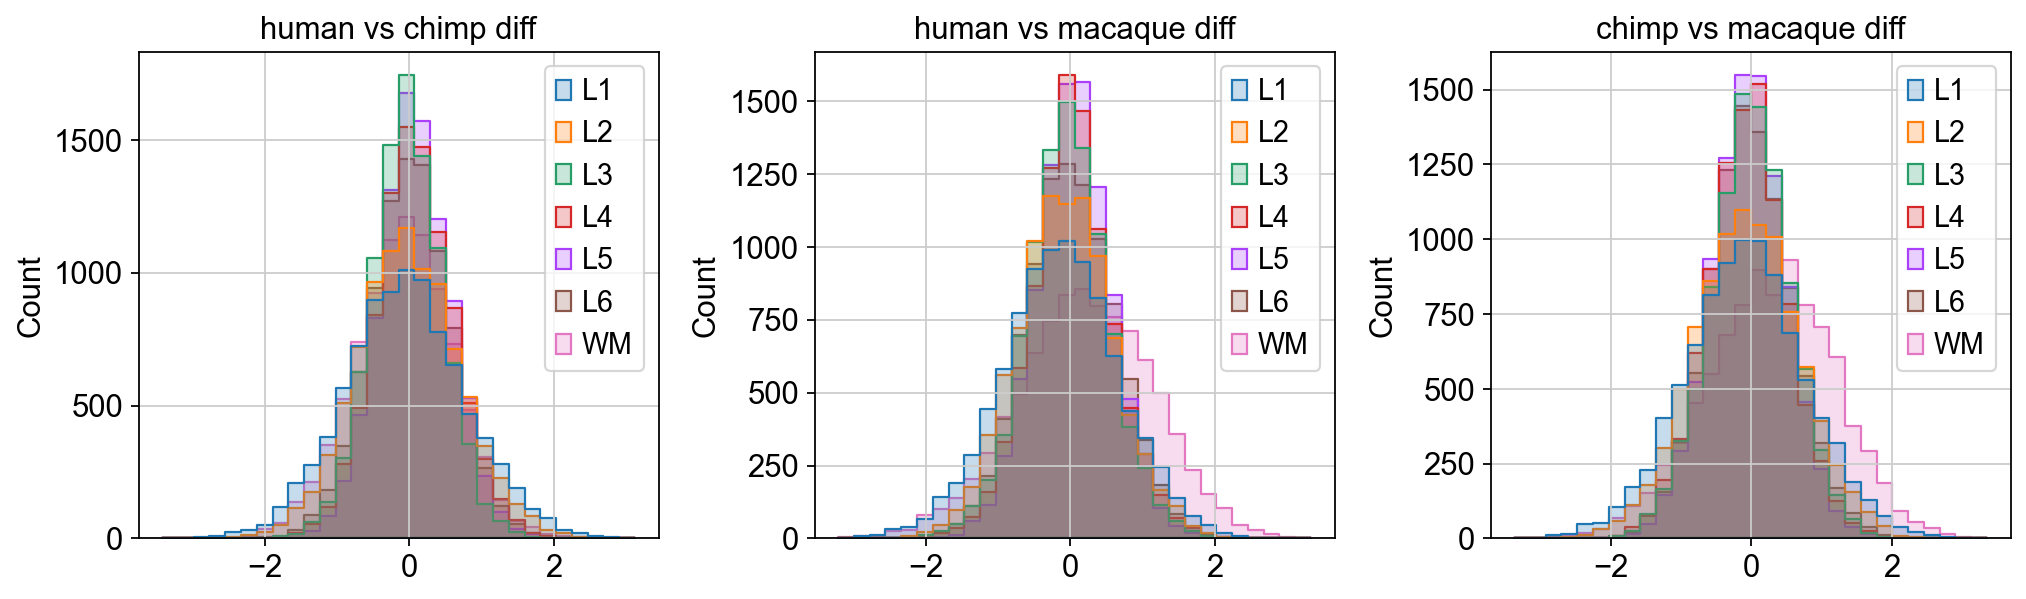

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4), gridspec_kw={'wspace': 0.3})

sns.histplot(human_chimp_diff, bins=30, element="step", ax=ax[0])
ax[0].set_title('human vs chimp diff')

sns.histplot(human_macaque_diff, bins=30, element="step", ax=ax[1])
ax[1].set_title('human vs macaque diff')

sns.histplot(chimp_macaque_diff, bins=30, element="step", ax=ax[2])
ax[2].set_title('chimp vs macaque diff')

# Human-specific genes for each layer

## Calculate the ratio

Load human vs chimp and human vs macaque differecies to one dataframe

In [16]:
hum_stack = human_chimp_diff.stack().to_frame().swaplevel(1, 0)
hum_stack.columns = ['human_chimp_diff']
hum_stack['human_macaque_diff'] = human_macaque_diff.stack().swaplevel(1, 0)
hum_stack['ΔHC/ΔHM'] = hum_stack['human_chimp_diff'] / hum_stack['human_macaque_diff']
hum_stack.head()

human_chimp_diff  human_macaque_diff   ΔHC/ΔHM
L1 A1BG         -0.905086           -1.018086  0.889007
L2 A1BG          1.081197           -0.573703 -1.884593
L3 A1BG         -0.537651            0.948931 -0.566587
L4 A1BG         -0.221108            0.826215 -0.267615
L5 A1BG          0.084847            0.226093  0.375275

Add t-test results for ANOVA significant genes

In [17]:
hum_stack['hc_p_val_adj'] = ttest_res[(ttest_res.group1 == 'human') & (ttest_res.group2 == 'chimp')].set_index(['layer', 'gene']).p_val_adj
hum_stack['hm_p_val_adj'] = ttest_res[(ttest_res.group1 == 'human') & (ttest_res.group2 == 'macaque')].set_index(['layer', 'gene']).p_val_adj
hum_stack['cm_p_val_adj'] = ttest_res[(ttest_res.group1 == 'chimp') & (ttest_res.group2 == 'macaque')].set_index(['layer', 'gene']).p_val_adj
hum_stack.head()

#hum_stack['mult_diff'] = hum_stack['human_chimp_diff'] * hum_stack['human_macaque_diff']
#hum_spec_stack = hum_stack[hum_stack.mult_diff > 0].sort_index()
#hum_spec_stack.head()

human_chimp_diff  human_macaque_diff   ΔHC/ΔHM  hc_p_val_adj  \
L1 A1BG         -0.905086           -1.018086  0.889007      0.280856   
L2 A1BG          1.081197           -0.573703 -1.884593      0.335712   
L3 A1BG         -0.537651            0.948931 -0.566587      0.378553   
L4 A1BG         -0.221108            0.826215 -0.267615      0.709464   
L5 A1BG          0.084847            0.226093  0.375275      0.945910   

         hm_p_val_adj  cm_p_val_adj  
L1 A1BG      0.339575      0.940987  
L2 A1BG      0.555180      0.052087  
L3 A1BG      0.184102      0.040639  
L4 A1BG      0.334743      0.266840  
L5 A1BG      0.837651      0.786265

Text(0, 0.5, 'Number of genes')

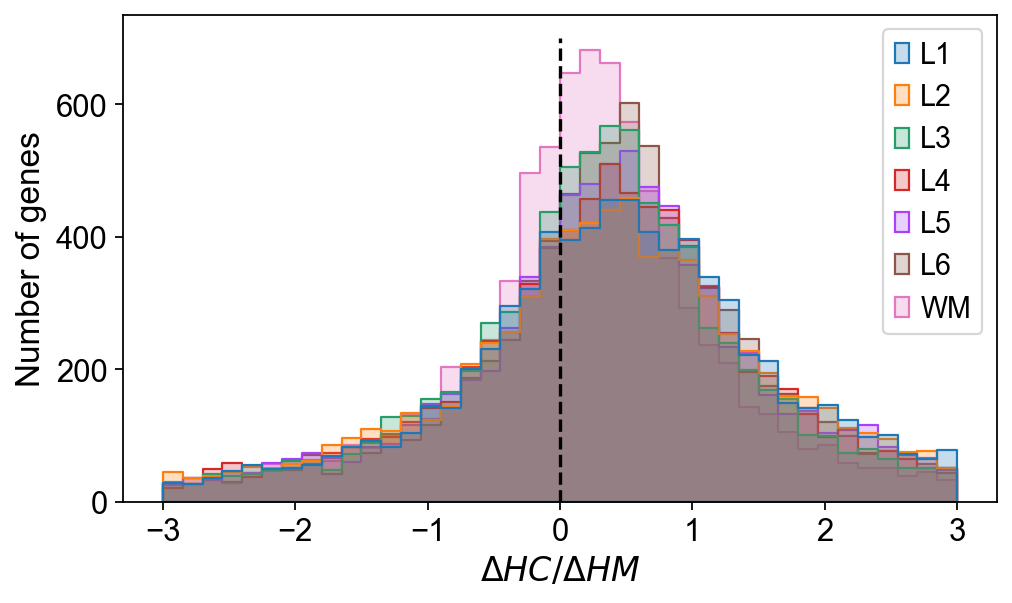

In [18]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.histplot(hum_stack['ΔHC/ΔHM'].unstack().T, element="step", binrange=[-3, 3], bins=40)
plt.vlines(0, ymin=0, ymax=700, colors='black', linestyles='dashed')
ax.grid(False)
ax.set_xlabel('$\Delta HC / \Delta HM$', fontsize=15)
ax.set_ylabel('Number of genes', fontsize=15)

In [19]:
hum_stack['human_chimp_diff'] / hum_stack['human_macaque_diff']

L1  A1BG      0.889007
L2  A1BG     -1.884593
L3  A1BG     -0.566587
L4  A1BG     -0.267615
L5  A1BG      0.375275
               ...    
L3  ZZZ3   -109.494156
L4  ZZZ3      2.505253
L5  ZZZ3     -1.637951
L6  ZZZ3     -0.893194
WM  ZZZ3     -0.098159
Length: 64456, dtype: float32

In [20]:
(hum_stack['ΔHC/ΔHM'] > 0).value_counts()

ΔHC/ΔHM
True     41469
False    22987
Name: count, dtype: int64

# Select for whole profile

## Filter human-specific profiles

In [21]:
#human_chimp_diff, human_macaque_diff, chimp_macaque_diff

In [22]:
hc_l1 = human_chimp_diff.abs().sum(axis=1)
hm_l1 = human_macaque_diff.abs().sum(axis=1)
cm_l1 = chimp_macaque_diff.abs().sum(axis=1)

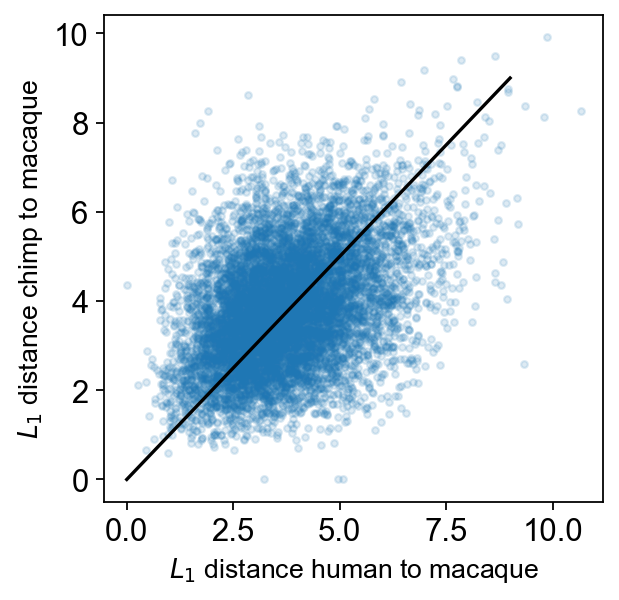

In [23]:
plt.plot(hm_l1, cm_l1, '.', alpha=0.15)
plt.plot([0, 9], [0, 9], 'black')
plt.xlabel('$L_1$ distance human to macaque', fontsize=12)
plt.ylabel('$L_1$ distance chimp to macaque', fontsize=12)
plt.grid(False)

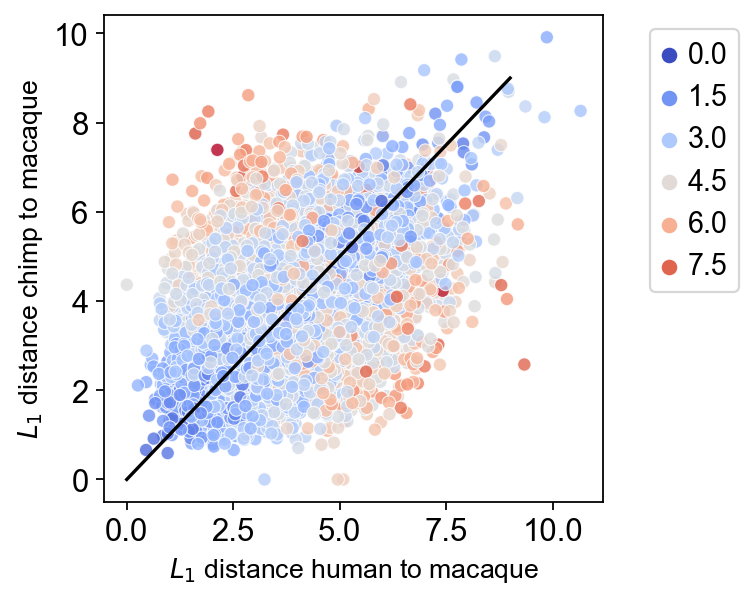

In [24]:
sns.scatterplot(x=hm_l1, y=cm_l1, hue=hc_l1, alpha=0.8, palette='coolwarm')
plt.plot([0, 9], [0, 9], 'black')
plt.xlabel('$L_1$ distance human to macaque', fontsize=12)
plt.ylabel('$L_1$ distance chimp to macaque', fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(False)

Text(0.5, 0, '$L_1(HM) - L1(CM)$ ')

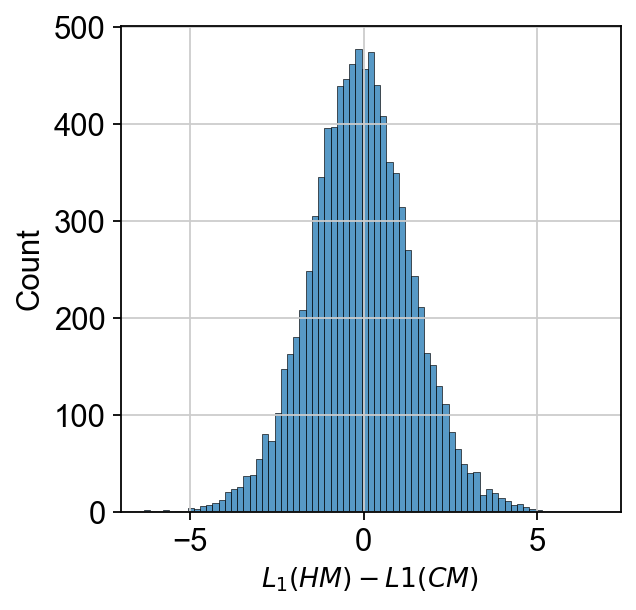

In [25]:
sns.histplot(hm_l1 - cm_l1)
plt.xlabel('$L_1(HM) - L1(CM)$ ', fontsize=12)

Filter genes:
$$
L_1(HM) > L_1(CM)
$$

In [26]:
gene_filter1 = (hm_l1 > cm_l1)

In [27]:
gene_filter2 = (hm_l1 > hc_l1)

Filter genes:
$$
0.5 \le \frac{L_1(HC)}{L_1(HM)} \le 1
$$

In [28]:
#gene_filter2 = ((hc_l1 / hm_l1 >= 0.5) & (hc_l1 / hm_l1 <= 1))

Filter genes:
$$
L_1(HC) >= q_{0.9}
$$

In [29]:
quantile = 0.9
quant_value = hc_l1.quantile(quantile)
gene_filter3 = (hc_l1 >= quant_value)
gene_filter3.sum()

921

Text(0.5, 1.0, '$L_1$ distance human vs chimp')

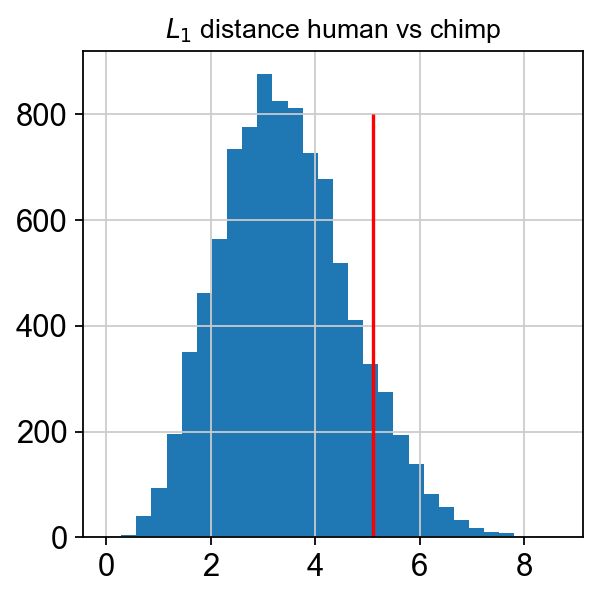

In [30]:
plt.vlines(quant_value, ymin=0, ymax=800,colors='red')
hc_l1.hist(bins=30)
plt.title('$L_1$ distance human vs chimp', fontsize=12)

Apply all filters to find genes with human-specific profiles

In [31]:
#hs_genes = hc_l1[(gene_filter1) & (gene_filter2 | gene_filter3)].index
hs_genes = hc_l1[(gene_filter1) & (gene_filter2) & (gene_filter3)].index
hs_genes

Index(['ABL2', 'ACSL4', 'AKT3', 'AMER2', 'ANKRD29', 'APBA1', 'ARFGEF3',
       'ASAP2', 'ATAD1', 'ATP5F1E',
       ...
       'TRIM9', 'TRIO', 'TSPO', 'TUBGCP4', 'UBE2V1', 'UNC13A', 'USP46',
       'VPS37C', 'ZBTB34', 'ZYX'],
      dtype='object', length=142)

In [32]:
hs_layers_prof_inter = hum_spec_onehot.columns.intersection(hs_genes)
hs_layers_prof_inter

Index(['ABL2', 'ACSL4', 'AKT3', 'AMER2', 'ANKRD29', 'APBA1', 'ARFGEF3',
       'ASAP2', 'ATAD1', 'BET1L',
       ...
       'TRIM9', 'TRIO', 'TSPO', 'TUBGCP4', 'UBE2V1', 'UNC13A', 'USP46',
       'VPS37C', 'ZBTB34', 'ZYX'],
      dtype='object', length=132)

Text(0.5, 1.0, 'Number of human-specific genes for each layer')

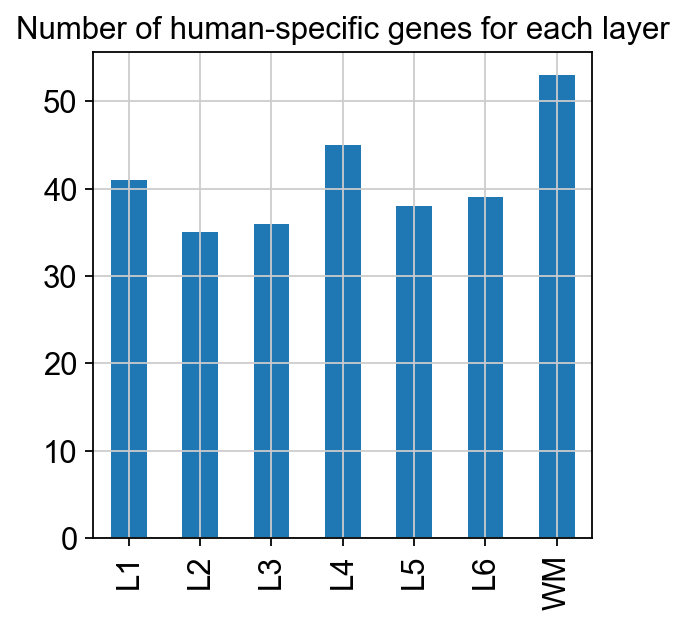

In [33]:
hs_inter_onehot = hum_spec_onehot[hs_layers_prof_inter]
hs_inter_onehot.sum(axis=1).plot.bar()
plt.title('Number of human-specific genes for each layer')

In [34]:
from itertools import combinations
count_df = pd.DataFrame(columns=hs_inter_onehot.index, index=hs_inter_onehot.index)
for lay1, lay2 in combinations(layers, 2):
    count_num = (hs_inter_onehot.loc[lay1] * hs_inter_onehot.loc[lay2]).sum()
    count_df.loc[[lay1, lay2], [lay1, lay2]] = count_num
    count_df.loc[lay1, lay1] = hs_inter_onehot.loc[lay1].sum()
    count_df.loc[lay2, lay2] = hs_inter_onehot.loc[lay2].sum()
count_df = count_df.astype(int)
count_df

L1  L2  L3  L4  L5  L6  WM
L1  41   7   8  11  11   8  11
L2   7  35  10  15   7  10  14
L3   8  10  36  12   6  10  14
L4  11  15  12  45  10  13  17
L5  11   7   6  10  38  16  13
L6   8  10  10  13  16  39  11
WM  11  14  14  17  13  11  53

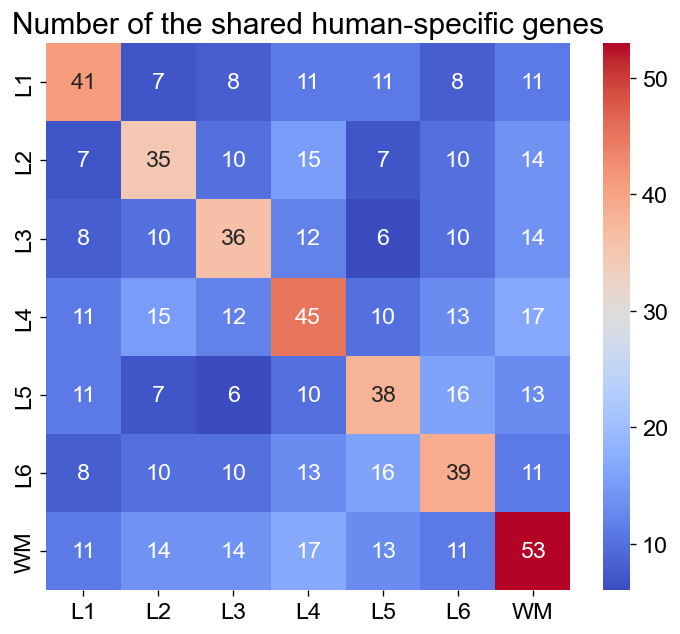

In [35]:
plt.figure(figsize=(7, 6), dpi=60)
sns.heatmap(count_df, annot=True, cmap = 'coolwarm', fmt=".0f")
plt.title('Number of the shared human-specific genes', fontsize=18)
plt.grid(False)

## Intersection with ANOVA genes

In [36]:
df = pd.DataFrame(adata_pb_norm.X, index=adata_pb_norm.obs_names, columns=adata_pb_norm.var_names)
df.head()

A1BG      AAAS      AACS     AADAT     AAGAB      AAK1  \
chimp_11454_L1  0.067607  1.677290 -1.534315  0.929936 -1.891263 -1.121907   
chimp_13309_L1 -0.620890 -0.837512 -0.035323 -0.156411  1.389692  0.899977   
chimp_j8_L1     0.180522  1.164353 -0.967539  0.124353  1.043396 -0.044744   
human_759_L1   -1.331822  2.137584 -1.205822  0.901628 -1.817619 -1.699446   
human_j12_L1   -0.233744  0.324173 -2.036622 -0.808470 -0.009232 -1.925505   

                   AAMDC      AAMP      AAR2     AARS1  ...    ZSWIM5  \
chimp_11454_L1  2.229827  0.418000 -0.182887  0.048899  ...  2.267787   
chimp_13309_L1 -1.379352  0.203313  1.537268  0.551155  ...  0.000000   
chimp_j8_L1     0.921149 -0.260578  0.199490  0.714291  ...  0.000000   
human_759_L1    1.991166 -0.914848 -0.788294 -0.647242  ...  0.415925   
human_j12_L1    1.342983 -1.619777 -1.418294 -1.010445  ... -1.644043   

                  ZSWIM6    ZSWIM7    ZSWIM8      ZUP1    ZWILCH    ZYG11B  \
chimp_11454_L1 -0.605884 -1.395130 -1.446029 -2.058029  0.766767 -0.871571   
chimp_13309_L1  2.147622 -0.679872  0.606861 -2.148551 -0.496705 -0.991205   
chimp_j8_L1    -0.542437  0.406670  1.972330  1.190047 -0.278057 -0.758739   
human_759_L1    0.461636 -0.452875 -0.346116 -0.100112 -1.887467 -1.363774   
human_j12_L1   -0.352265  1.806208  0.183947 -1.941861 -1.789864 -1.398794   

                     ZYX     ZZEF1      ZZZ3  
chimp_11454_L1  2.119675 -1.825826  0.044699  
chimp_13309_L1 -0.377964 -1.916228  0.735414  
chimp_j8_L1    -0.983870  1.912076  0.256580  
human_759_L1    1.315433  0.350686  0.344768  
human_j12_L1    0.664080 -1.271133  1.354874  

[5 rows x 9208 columns]

In [37]:
sample_order = dict()
for cond in ['human', 'chimp', 'macaque']:
    samples = df.loc[df.index.str.contains(cond)].index
    order = sorted(samples.tolist(), key=lambda x: x[-2:])
    order_laminar = list(filter(lambda x: 'L' in x, order))
    order_wm = list(filter(lambda x: 'WM' in x, order))
    sample_order[cond] = order_wm + order_laminar
sample_order['all'] = sample_order['human'] + sample_order['chimp'] + sample_order['macaque']
df = df.loc[sample_order['all']]

In [38]:
anova_hs_inter = hs_genes.intersection(anova_labels.index)
anova_hs_inter

Index(['ABL2', 'ACSL4', 'AKT3', 'AMER2', 'ANKRD29', 'APBA1', 'ARFGEF3',
       'ASAP2', 'ATAD1', 'ATP5F1E',
       ...
       'TRIM9', 'TRIO', 'TSPO', 'TUBGCP4', 'UBE2V1', 'UNC13A', 'USP46',
       'VPS37C', 'ZBTB34', 'ZYX'],
      dtype='object', length=136)

Text(0.5, 1.0, 'Portion of genes with HS profiles')

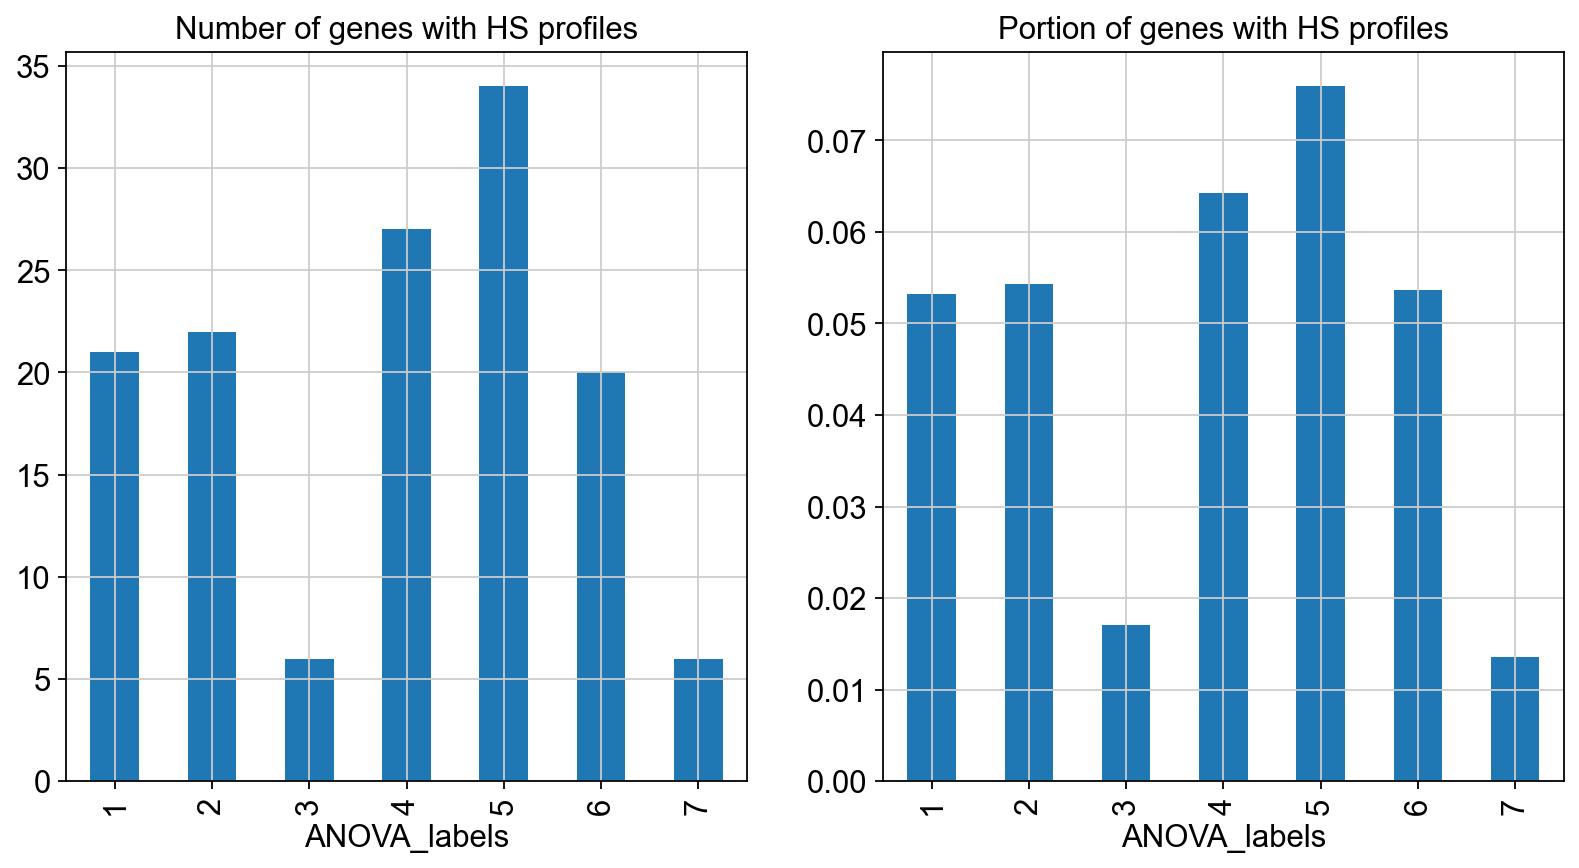

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
anova_counts = anova_labels.loc[anova_hs_inter].value_counts().sort_index()
anova_counts.plot.bar(ax=ax[0])
ax[0].set_title('Number of genes with HS profiles')

anova_freq = anova_counts / anova_labels.value_counts().sort_index()
anova_freq.plot.bar(ax=ax[1])
ax[1].set_title('Portion of genes with HS profiles')

In [40]:
df_annotation = df[anova_hs_inter].copy()
df_annotation['layer'] = adata_pb_norm.obs.layer
df_annotation['condition'] = adata_pb_norm.obs.condition

In [41]:
layer_mean = df_annotation.groupby(['condition', 'layer']).mean()
layer_mean.head()

ABL2     ACSL4      AKT3     AMER2   ANKRD29     APBA1  \
condition layer                                                               
chimp     L1    -0.686058  0.524083 -0.441710  1.088793  0.261183 -0.397902   
          L2    -0.686058 -0.818999 -0.526617 -0.045575  1.071689  0.295968   
          L3     0.213414  0.215657  0.123264 -0.310359  0.831205  0.519935   
          L4    -0.275781 -0.525698 -0.201124 -0.519289  0.145844 -0.125792   
          L5     0.105707  0.203608 -0.646220 -0.398836  0.159298 -0.488295   

                  ARFGEF3     ASAP2     ATAD1   ATP5F1E  ...     TRIM9  \
condition layer                                          ...             
chimp     L1     0.130788 -0.602761 -0.775195  0.830572  ... -0.646238   
          L2     0.268740 -0.633522  0.752684 -0.261341  ... -0.019331   
          L3    -0.367704  0.185047  0.214706  0.149551  ...  0.047065   
          L4    -0.002306 -0.581830  0.112722  0.388310  ...  0.230547   
          L5    -0.139190  0.368900 -0.001449 -0.034932  ...  0.589260   

                     TRIO      TSPO   TUBGCP4    UBE2V1    UNC13A     USP46  \
condition layer                                                               
chimp     L1     0.050415  0.628075 -0.308768 -1.026935 -0.707192  1.186548   
          L2     0.242231 -0.813974  0.808860 -0.884772 -0.707192 -0.741850   
          L3    -0.444618 -0.413851  0.072744  0.189302  0.635265 -0.923500   
          L4    -0.638372 -0.695250 -0.004791  0.165501 -0.151694 -0.626382   
          L5    -0.393268 -0.049638 -0.539113  0.309770 -0.041295 -0.295141   

                   VPS37C    ZBTB34       ZYX  
condition layer                                
chimp     L1    -0.663865 -0.251976  0.252614  
          L2    -0.512767 -0.251976 -0.645583  
          L3     0.306340  0.160184  0.367243  
          L4     0.095122 -0.015074  0.850038  
          L5    -0.150435 -0.296694 -0.293464  

[5 rows x 136 columns]

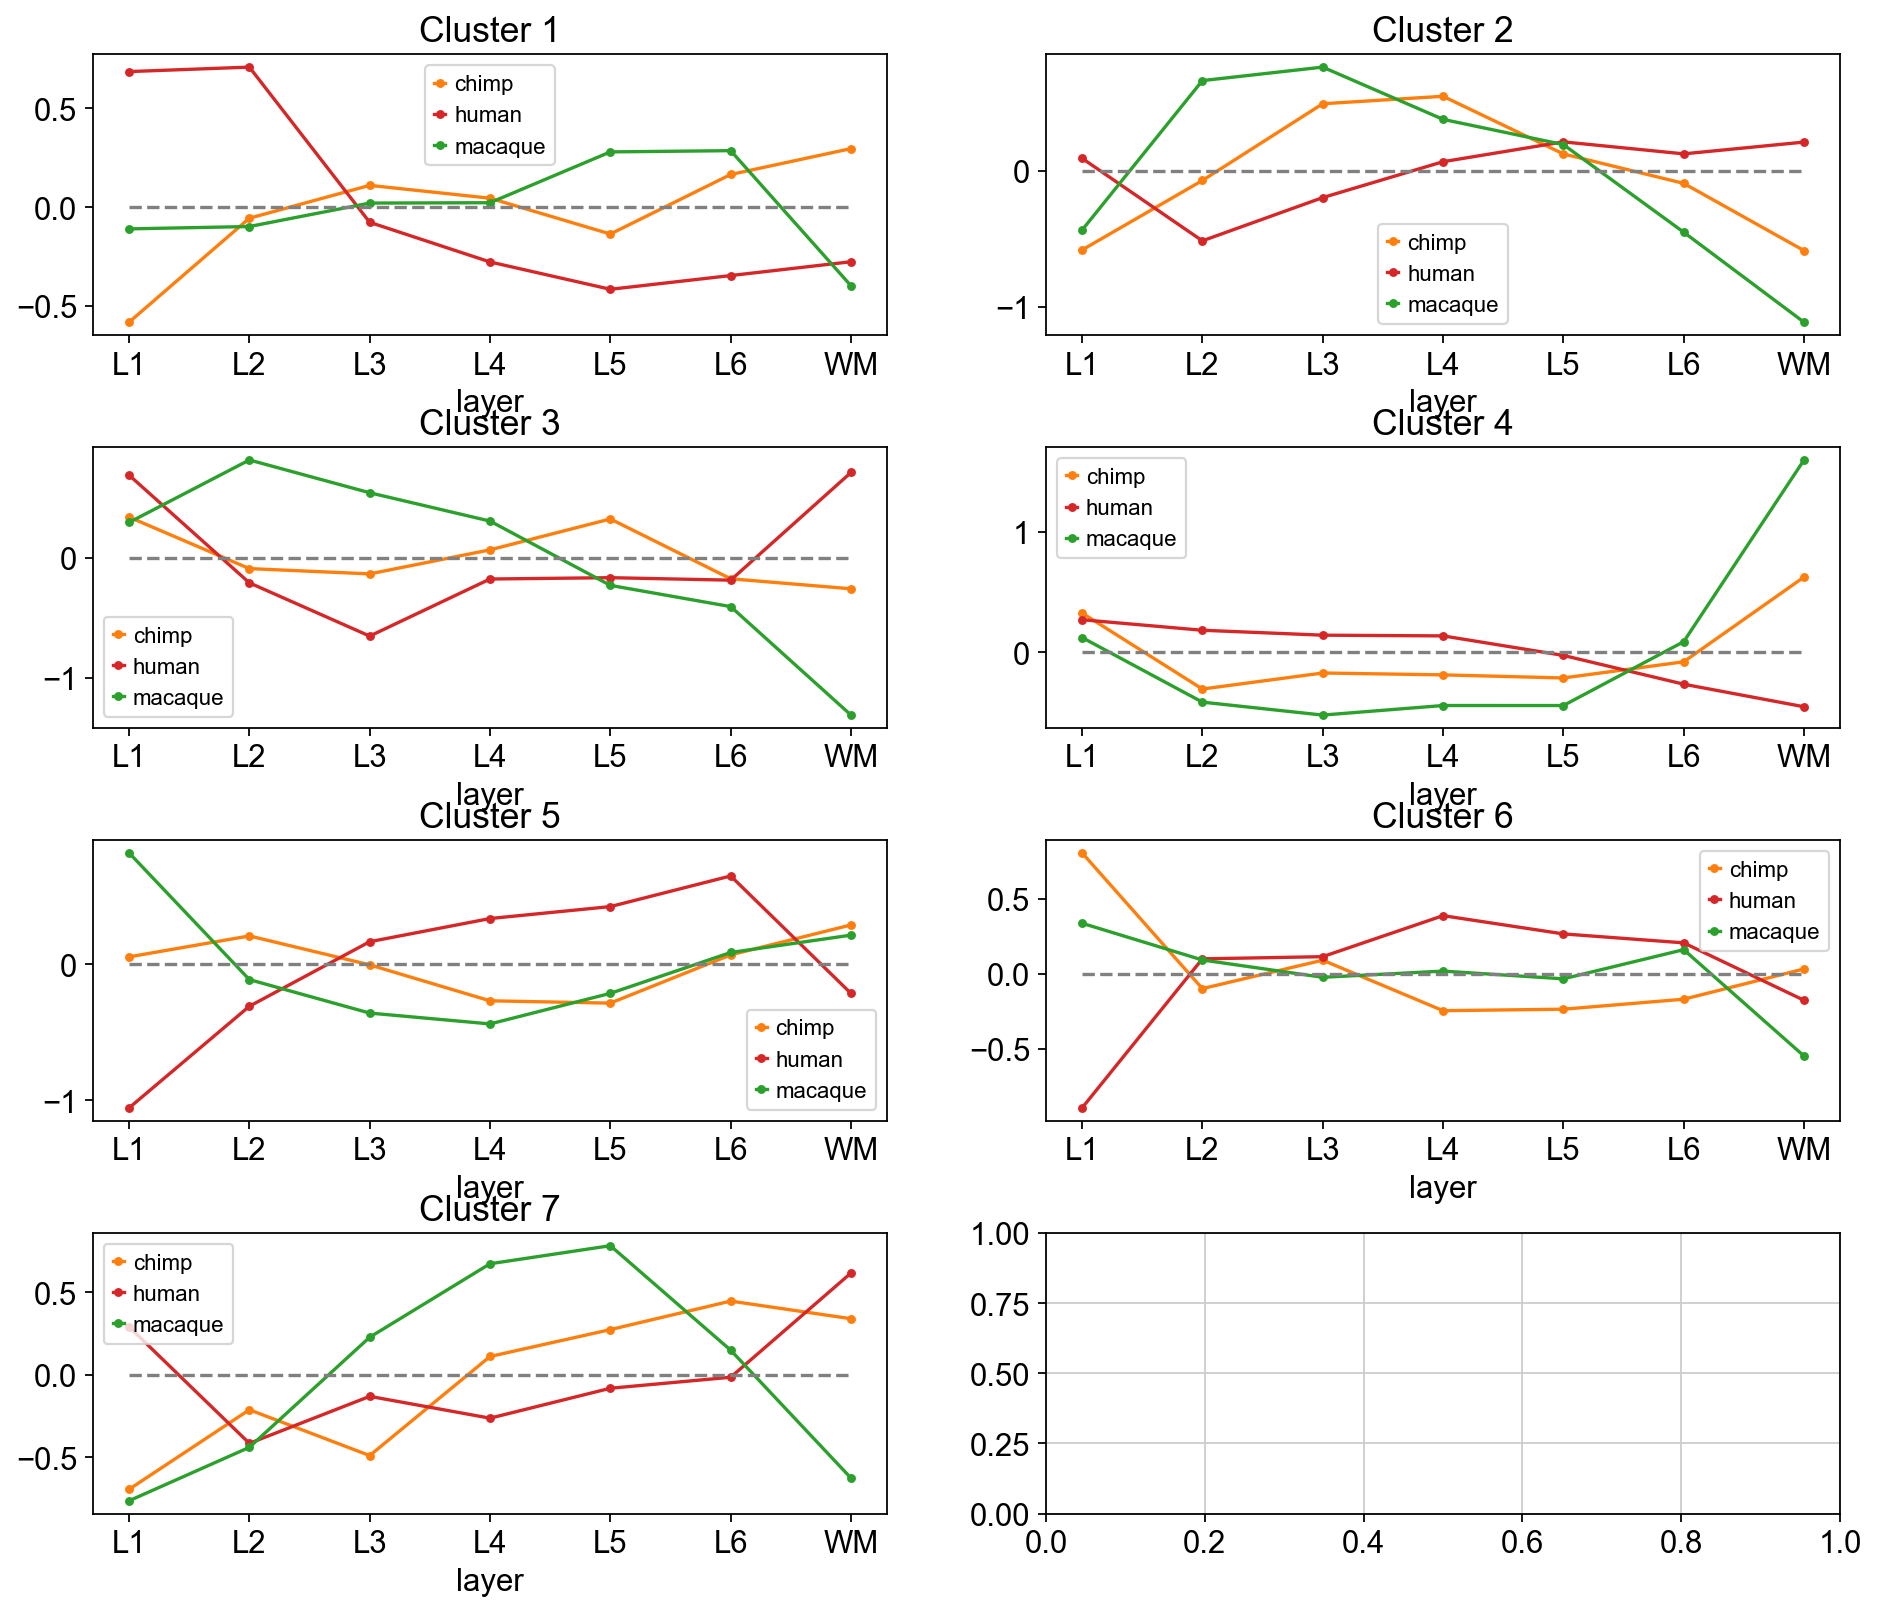

In [42]:
fig, axes = plt.subplots((n_clusters + 1) // 2, 2,  figsize=(14, 3.5 * n_clusters // 2), gridspec_kw={'hspace': 0.4})

for label, ax in zip(anova_labels.unique(), axes.flatten()):
    genes = anova_labels.loc[anova_hs_inter]
    genes = genes[genes == label].index.tolist()

    (
        layer_mean[genes]
        .mean(axis=1)
        .reorder_levels(['layer', 'condition'])
        .unstack().loc[layers]
        .plot
        .line(color={'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green'}, ax=ax, marker='.')
    )
    ax.legend(fontsize=10)
    ax.set_title(f'Cluster {label}', fontsize=16)
    ax.grid(False)
    ax.hlines(0, xmin=0, xmax=6, colors='gray', linestyles='dashed')
#plt.savefig(f'hs_clusters.png', bbox_inches='tight')

In [43]:
anova_hs_inter

Index(['ABL2', 'ACSL4', 'AKT3', 'AMER2', 'ANKRD29', 'APBA1', 'ARFGEF3',
       'ASAP2', 'ATAD1', 'ATP5F1E',
       ...
       'TRIM9', 'TRIO', 'TSPO', 'TUBGCP4', 'UBE2V1', 'UNC13A', 'USP46',
       'VPS37C', 'ZBTB34', 'ZYX'],
      dtype='object', length=136)

In [44]:
hum_spec_anova_onehot = hs_inter_onehot[hs_inter_onehot.columns.intersection(anova_hs_inter)]

In [45]:
onehot_unstack = hum_spec_anova_onehot.unstack()
onehot_unstack.name = 'hum-spec & ANOVA'
onehot_unstack = onehot_unstack.to_frame()
onehot_unstack.index.names = ['gene', 'layer']
onehot_unstack.index.get_level_values('gene')
onehot_unstack.reset_index(level=1, inplace=True)
onehot_unstack['ANOVA cluster'] = anova_labels.loc[onehot_unstack.index]
layer_count = onehot_unstack[onehot_unstack['hum-spec & ANOVA'] == 1].groupby(['ANOVA cluster', 'layer']).count().unstack()
layer_count = layer_count['hum-spec & ANOVA']
layer_count

layer          L1  L2  L3  L4  L5  L6  WM
ANOVA cluster                            
1               2   7   2   9   5   6   6
2               5   6   8   6   4   6  10
3               2   2   1   1   2   1   4
4               4   9  10   7   7   6  15
5              20   3   7  13  11  10   8
6               4   5   5   5   4   6   5
7               2   1   2   1   4   2   2

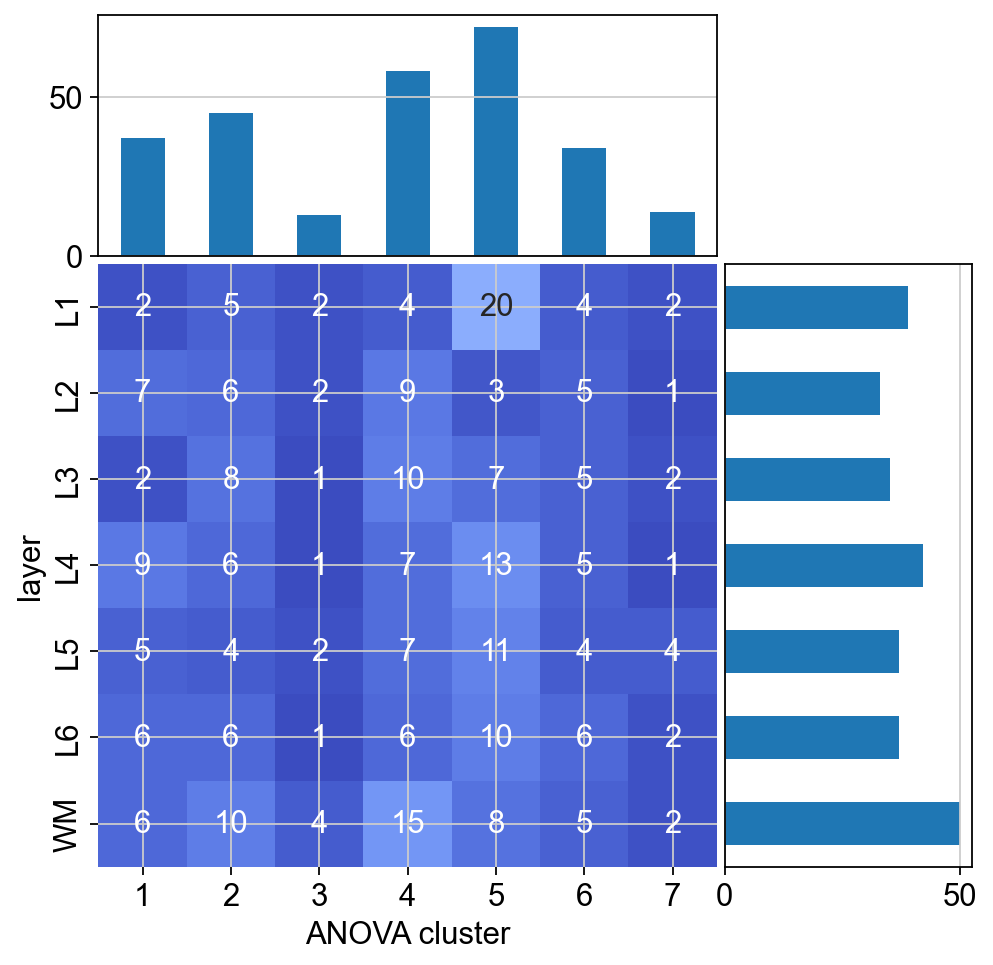

In [46]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(layer_count.T, annot=True, cmap = 'coolwarm', center=40, fmt=".0f", ax=ax, cbar=False)


divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='40%', pad=0.05)
layer_count.sum(axis=1).plot.bar(ax=cax)
cax.set_facecolor(color='white')
cax.get_xaxis().set_visible(False)

cax = divider.append_axes('right', size='40%', pad=0.05)
index_order = layer_count.columns[::-1]
layer_count.sum(axis=0).loc[index_order].plot.barh(ax=cax)
cax.set_facecolor(color='white')
cax.get_yaxis().set_visible(False)

## Cluster genes

### Hierarchical

D:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


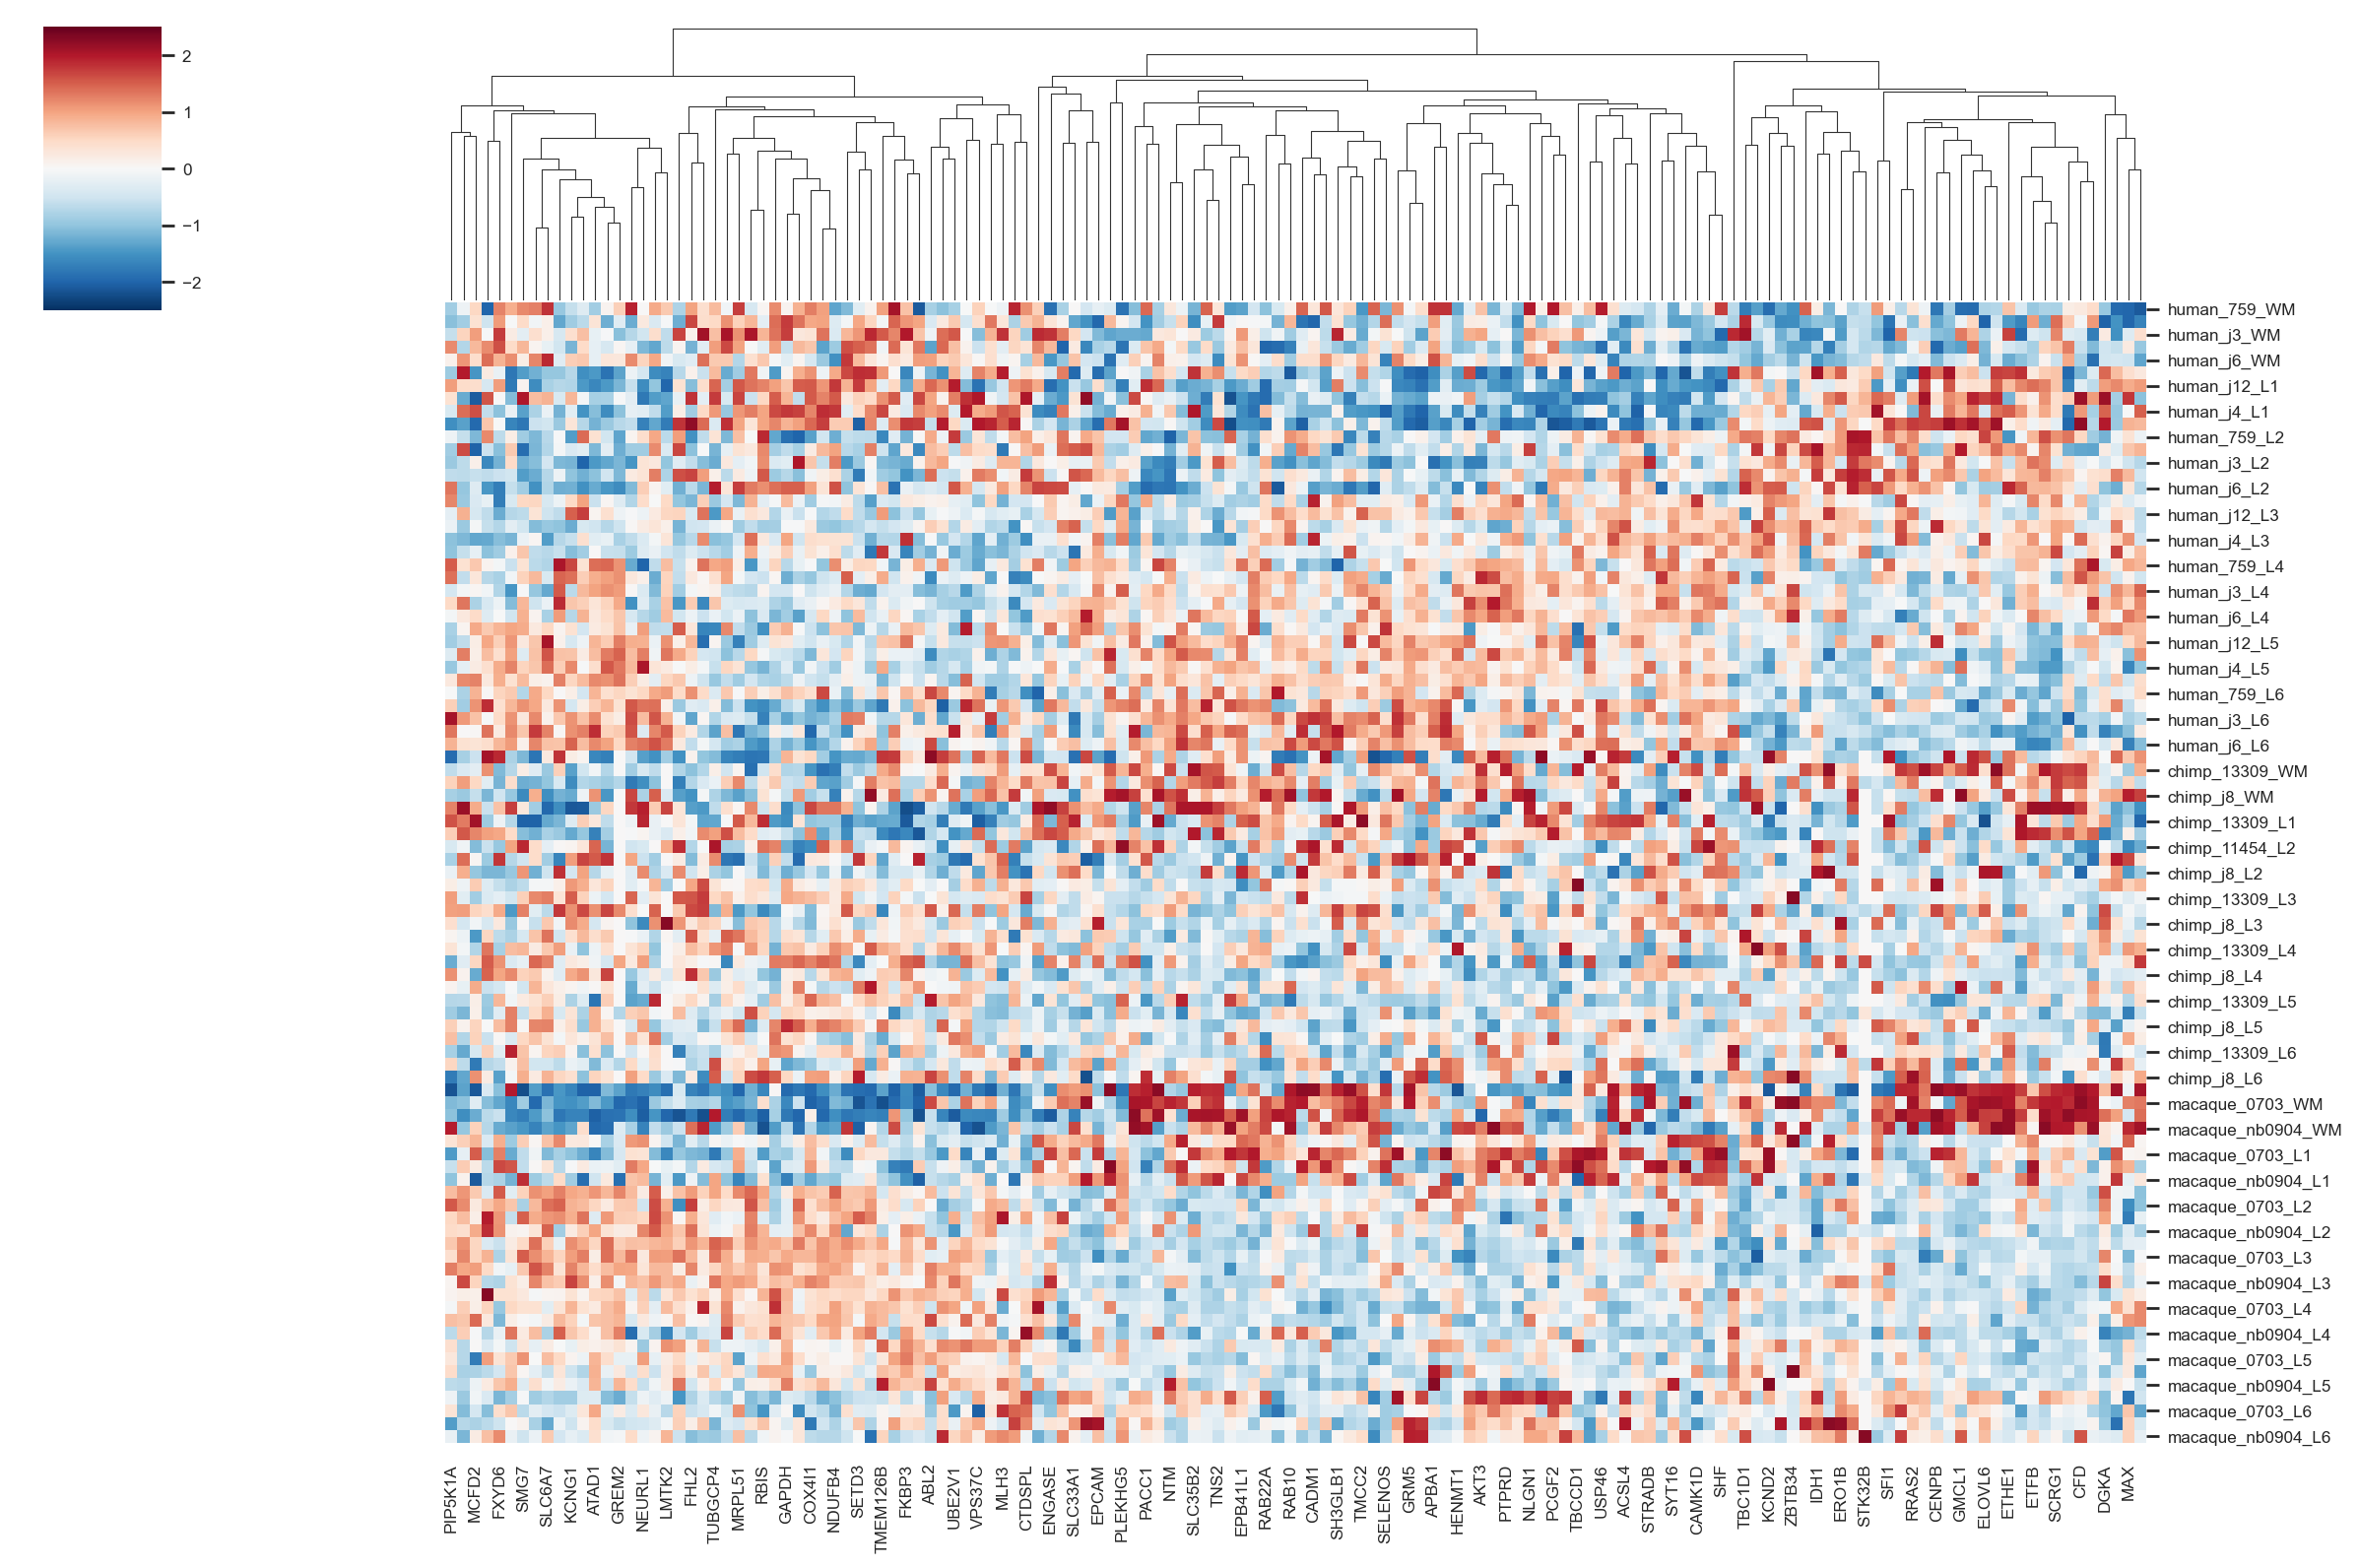

In [47]:
sns.set(font_scale=0.7)
sns.clustermap(df[hs_genes], figsize=(15, 10), cmap="RdBu_r", center=0, vmax=2.5, vmin=-2.5, metric='cosine', annot_kws={"size": 2}, row_cluster=False)

In [48]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import pairwise_kernels
aff_matrix = pairwise_kernels(df[hs_genes].T, metric='cosine') + 1
n_clusters = 7
clustering = SpectralClustering(n_clusters=n_clusters, gamma=1, affinity='precomputed', random_state=4)
clustering.fit(aff_matrix)

SpectralClustering(affinity='precomputed', gamma=1, n_clusters=7,
                   random_state=4)

In [49]:
labels = pd.Series(clustering.labels_, index=hs_genes).sort_values()
order = labels.sort_values().index

In [50]:
labels.to_csv('results/hs_prof.csv')

In [51]:
labels = pd.read_csv('results/hs_prof.csv', index_col=0)['0']
labels

INKA2      0
KCNG1      0
IFT22      0
NRXN1      0
GREM2      0
          ..
PIP5K1A    6
NEURL1     6
MRPL51     6
LDHB       6
NDUFB4     6
Name: 0, Length: 142, dtype: int64

<Axes: >

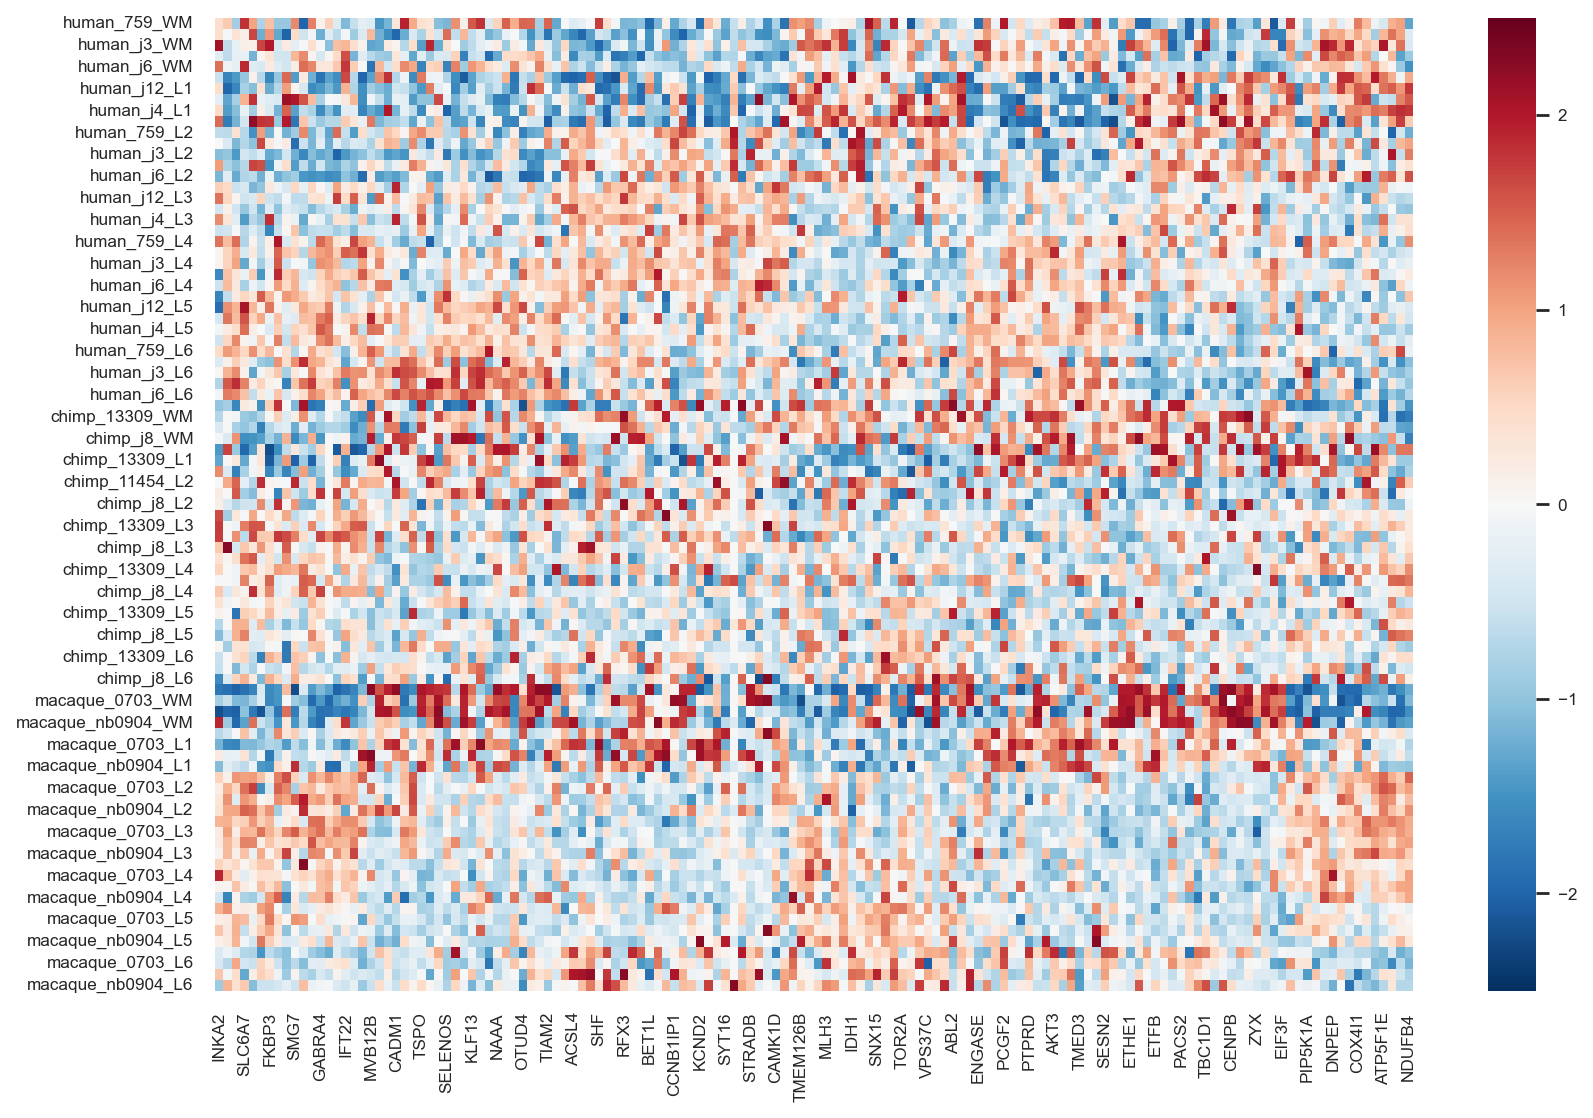

In [52]:
sns.set(font_scale=0.7)
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.loc[sample_order['all'], order], ax=ax, cmap="RdBu_r", vmax=2.5, vmin=-2.5, center=0)
#plt.savefig(f'heatmaps/heatmap_spectr{n_clusters}_anova.png', bbox_inches='tight')

In [53]:
df_annotation = df[hs_genes].copy()
df_annotation['layer'] = adata_pb_norm.obs.layer
df_annotation['condition'] = adata_pb_norm.obs.condition

In [54]:
layer_mean = df_annotation.groupby(['condition', 'layer']).mean()
layer_mean.head()

ABL2     ACSL4      AKT3     AMER2   ANKRD29     APBA1  \
condition layer                                                               
chimp     L1    -0.686058  0.524083 -0.441710  1.088793  0.261183 -0.397902   
          L2    -0.686058 -0.818999 -0.526617 -0.045575  1.071689  0.295968   
          L3     0.213414  0.215657  0.123264 -0.310359  0.831205  0.519935   
          L4    -0.275781 -0.525698 -0.201124 -0.519289  0.145844 -0.125792   
          L5     0.105707  0.203608 -0.646220 -0.398836  0.159298 -0.488295   

                  ARFGEF3     ASAP2     ATAD1   ATP5F1E  ...     TRIM9  \
condition layer                                          ...             
chimp     L1     0.130788 -0.602761 -0.775195  0.830572  ... -0.646238   
          L2     0.268740 -0.633522  0.752684 -0.261341  ... -0.019331   
          L3    -0.367704  0.185047  0.214706  0.149551  ...  0.047065   
          L4    -0.002306 -0.581830  0.112722  0.388310  ...  0.230547   
          L5    -0.139190  0.368900 -0.001449 -0.034932  ...  0.589260   

                     TRIO      TSPO   TUBGCP4    UBE2V1    UNC13A     USP46  \
condition layer                                                               
chimp     L1     0.050415  0.628075 -0.308768 -1.026935 -0.707192  1.186548   
          L2     0.242231 -0.813974  0.808860 -0.884772 -0.707192 -0.741850   
          L3    -0.444618 -0.413851  0.072744  0.189302  0.635265 -0.923500   
          L4    -0.638372 -0.695250 -0.004791  0.165501 -0.151694 -0.626382   
          L5    -0.393268 -0.049638 -0.539113  0.309770 -0.041295 -0.295141   

                   VPS37C    ZBTB34       ZYX  
condition layer                                
chimp     L1    -0.663865 -0.251976  0.252614  
          L2    -0.512767 -0.251976 -0.645583  
          L3     0.306340  0.160184  0.367243  
          L4     0.095122 -0.015074  0.850038  
          L5    -0.150435 -0.296694 -0.293464  

[5 rows x 142 columns]

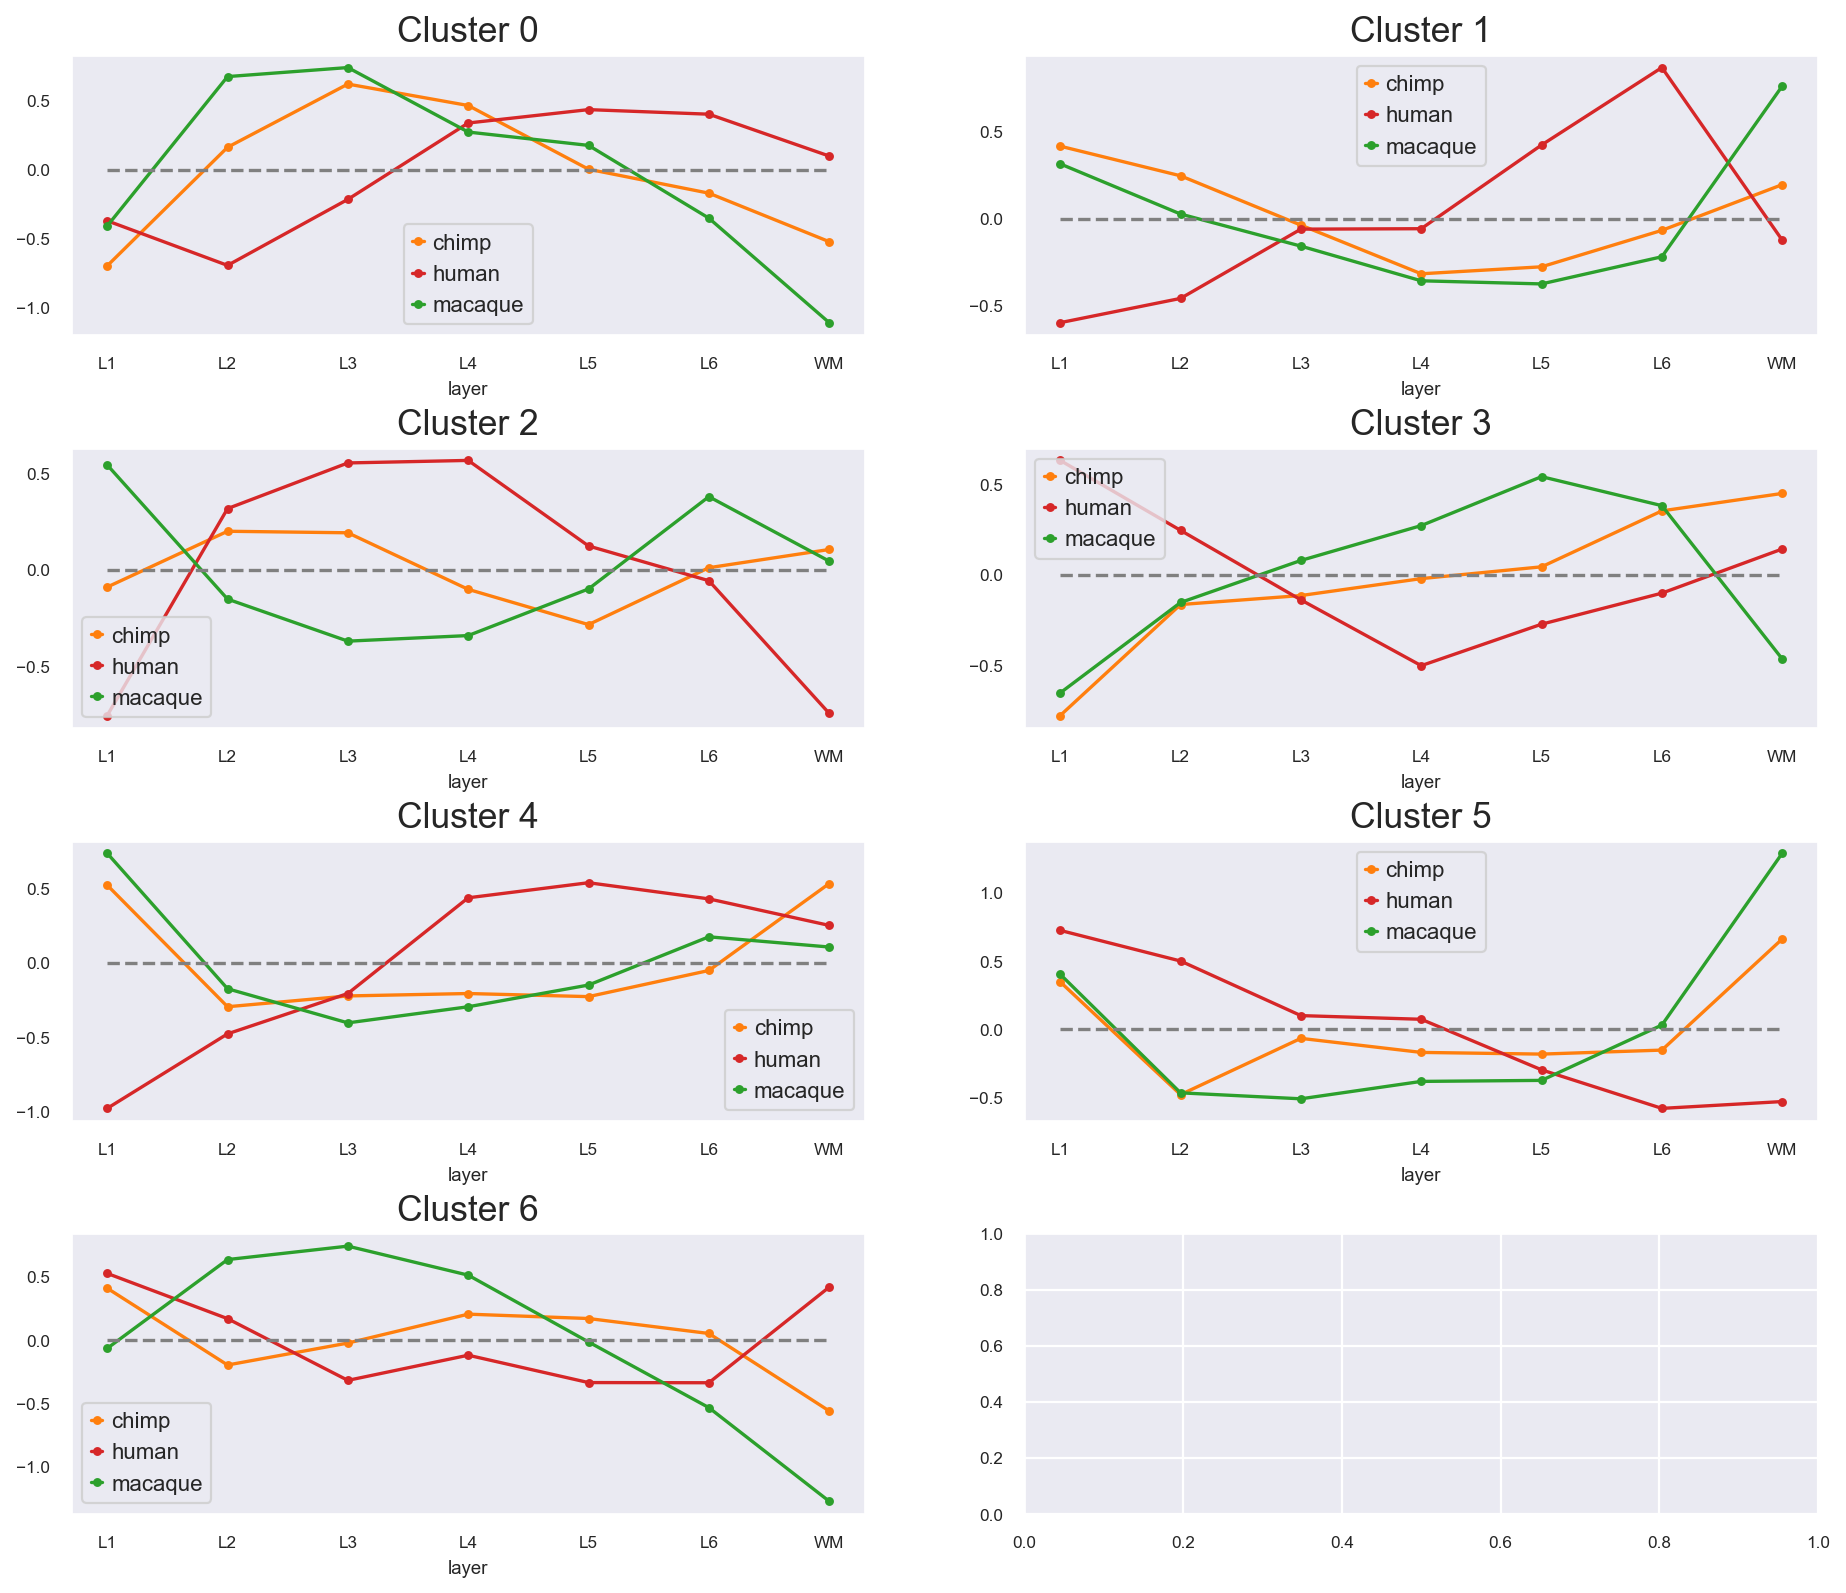

In [55]:
fig, axes = plt.subplots((n_clusters + 1) // 2, 2,  figsize=(14, 3.5 * n_clusters // 2), gridspec_kw={'hspace': 0.4})
sns.set(font_scale=1)
for label, ax in zip(labels.unique(), axes.flatten()):
    genes = labels[labels == label].index.tolist()

    (
        layer_mean[genes]
        .mean(axis=1)
        .reorder_levels(['layer', 'condition'])
        .unstack().loc[layers]
        .plot
        .line(color={'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green'}, ax=ax, marker='.')
    )
    ax.legend(fontsize=10)
    ax.set_title(f'Cluster {label}', fontsize=16)
    ax.grid(False)
    ax.hlines(0, xmin=0, xmax=6, colors='gray', linestyles='dashed')
#plt.savefig(f'hs_clusters.png', bbox_inches='tight')

## Intersect with ANOVA clusters

In [56]:
table_to_pivot = pd.concat([anova_labels.loc[anova_hs_inter], labels.loc[anova_hs_inter]], axis=1)
table_to_pivot.columns = ['ANOVA_labels', 'hs_labels']
pivot_labels_inter = table_to_pivot.groupby('ANOVA_labels').value_counts().unstack().fillna(0)
pivot_labels_inter

hs_labels        0    1     2     3     4     5    6
ANOVA_labels                                        
1              0.0  0.0   5.0  11.0   0.0   3.0  2.0
2             14.0  1.0   0.0   2.0   0.0   0.0  5.0
3              0.0  0.0   0.0   0.0   1.0   0.0  5.0
4              0.0  7.0   2.0   2.0   2.0  14.0  0.0
5              1.0  9.0  13.0   0.0  11.0   0.0  0.0
6              2.0  2.0   7.0   0.0   5.0   2.0  2.0
7              0.0  1.0   0.0   5.0   0.0   0.0  0.0

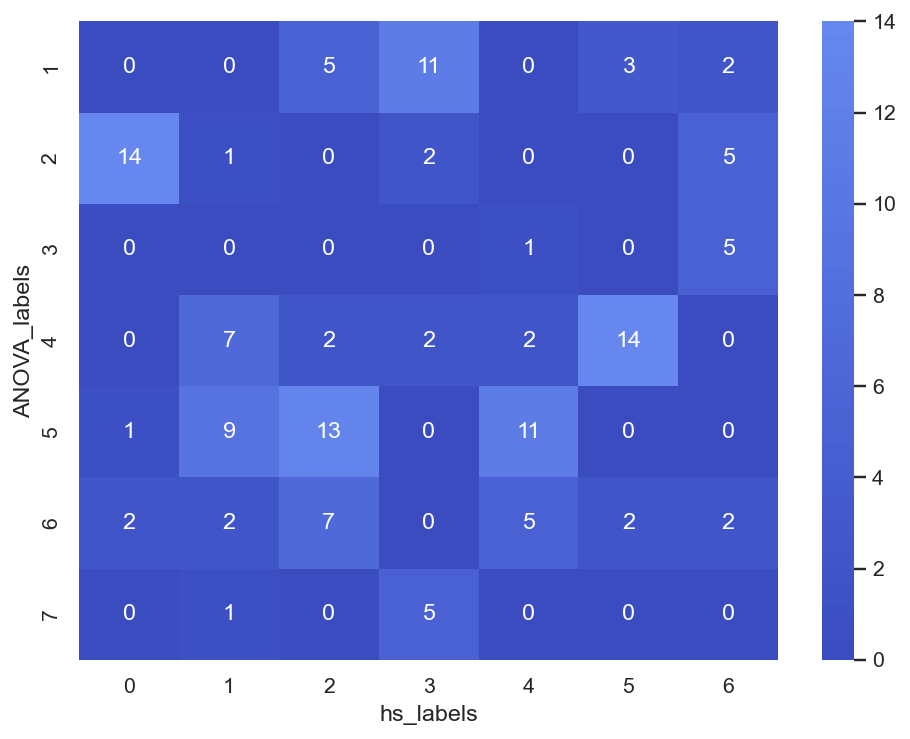

In [57]:
plt.figure(figsize=(8, 6), dpi=70)
sns.set(font_scale=1)
sns.heatmap(pivot_labels_inter, annot=True, cmap = 'coolwarm', center=50, fmt=".0f")
plt.grid(False)

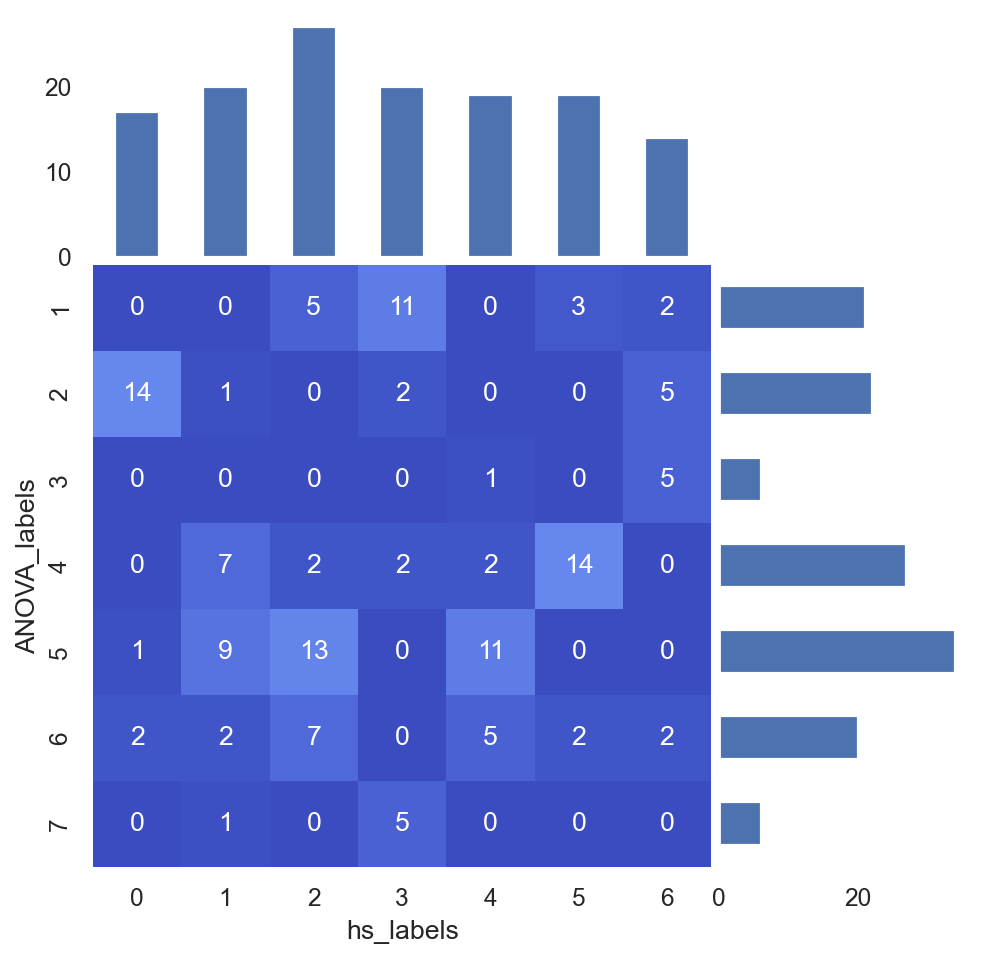

In [58]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(pivot_labels_inter, annot=True, cmap = 'coolwarm', center=50, fmt=".0f", ax=ax, cbar=False)


divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='40%', pad=0.05)
pivot_labels_inter.sum(axis=0).plot.bar(ax=cax)
cax.set_facecolor(color='white')
cax.get_xaxis().set_visible(False)

cax = divider.append_axes('right', size='40%', pad=0.05)
index_order = pivot_labels_inter.index[::-1]
pivot_labels_inter.sum(axis=1).loc[index_order].plot.barh(ax=cax)
cax.set_facecolor(color='white')
cax.get_yaxis().set_visible(False)

In [59]:
anova_dummies = anova_labels.astype(str).str.get_dummies()
anova_dummies.columns = 'ANOVA_' + anova_dummies.columns
anova_dummies.head()

ANOVA_1  ANOVA_2  ANOVA_3  ANOVA_4  ANOVA_5  ANOVA_6  ANOVA_7
ZYX           1        0        0        0        0        0        0
TOP2B         1        0        0        0        0        0        0
TOPORS        1        0        0        0        0        0        0
TOR2A         1        0        0        0        0        0        0
ARL15         1        0        0        0        0        0        0

In [60]:
hs_dummies = labels.astype(str).str.get_dummies()
hs_dummies.columns = 'hum-spec_' + hs_dummies.columns
hs_dummies.head()

hum-spec_0  hum-spec_1  hum-spec_2  hum-spec_3  hum-spec_4  hum-spec_5  \
INKA2           1           0           0           0           0           0   
KCNG1           1           0           0           0           0           0   
IFT22           1           0           0           0           0           0   
NRXN1           1           0           0           0           0           0   
GREM2           1           0           0           0           0           0   

       hum-spec_6  
INKA2           0  
KCNG1           0  
IFT22           0  
NRXN1           0  
GREM2           0

In [61]:
dummie_concat = pd.concat([anova_dummies, hs_dummies], axis=1).fillna(0)
dummie_concat.head()

ANOVA_1  ANOVA_2  ANOVA_3  ANOVA_4  ANOVA_5  ANOVA_6  ANOVA_7  \
ZYX         1.0      0.0      0.0      0.0      0.0      0.0      0.0   
TOP2B       1.0      0.0      0.0      0.0      0.0      0.0      0.0   
TOPORS      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
TOR2A       1.0      0.0      0.0      0.0      0.0      0.0      0.0   
ARL15       1.0      0.0      0.0      0.0      0.0      0.0      0.0   

        hum-spec_0  hum-spec_1  hum-spec_2  hum-spec_3  hum-spec_4  \
ZYX            0.0         0.0         0.0         0.0         0.0   
TOP2B          0.0         0.0         0.0         0.0         0.0   
TOPORS         0.0         0.0         0.0         0.0         0.0   
TOR2A          0.0         0.0         0.0         1.0         0.0   
ARL15          0.0         0.0         0.0         0.0         0.0   

        hum-spec_5  hum-spec_6  
ZYX            1.0         0.0  
TOP2B          0.0         0.0  
TOPORS         0.0         0.0  
TOR2A          0.0         0.0  
ARL15          0.0         0.0

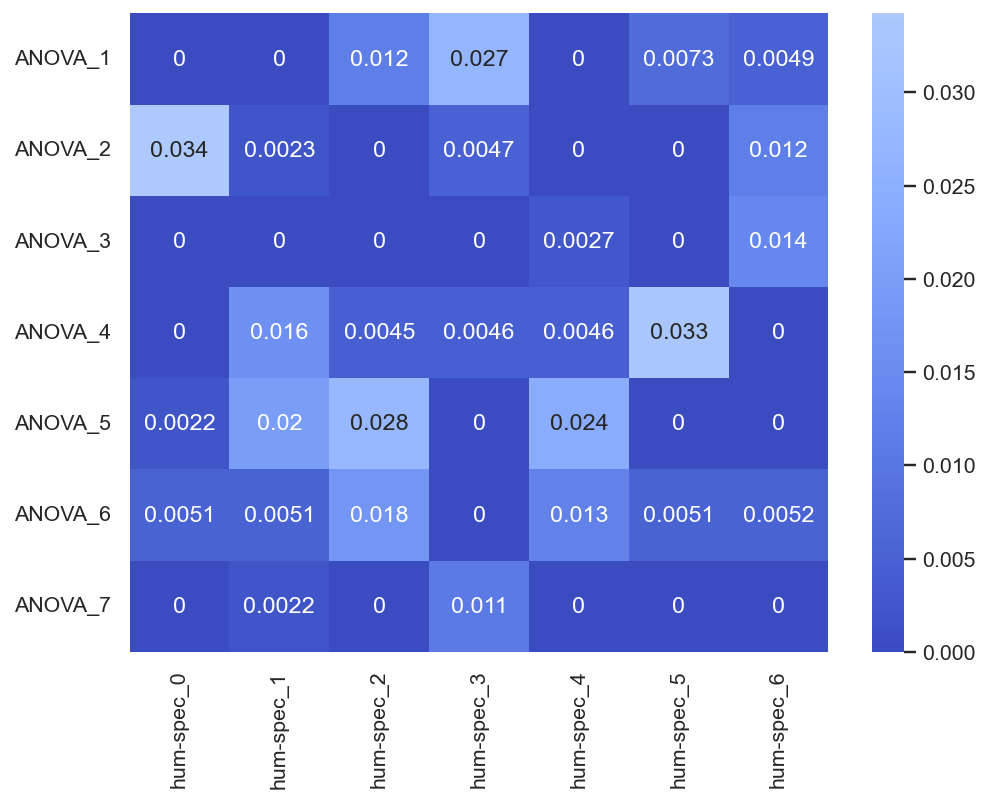

In [62]:
from sklearn.metrics import DistanceMetric
dist = DistanceMetric.get_metric('jaccard')
pairwise_jaccard = pd.DataFrame(1 - dist.pairwise(dummie_concat.T), columns=dummie_concat.columns, index=dummie_concat.columns)
pairwise_jaccard

plt.figure(figsize=(8, 6), dpi=70)
sns.set(font_scale=1)
sns.heatmap(pairwise_jaccard.loc[anova_dummies.columns, hs_dummies.columns], annot=True, cmap = 'coolwarm', center=0.05)
plt.grid(False)

In [63]:
onehot_unstack = hum_spec_anova_onehot.unstack()
onehot_unstack.name = 'hum-spec & ANOVA'
onehot_unstack = onehot_unstack.to_frame()
onehot_unstack.index.names = ['gene', 'layer']
onehot_unstack.index.get_level_values('gene')
onehot_unstack.reset_index(level=1, inplace=True)
onehot_unstack['HS cluster'] = labels.loc[onehot_unstack.index]
layer_count = onehot_unstack[onehot_unstack['hum-spec & ANOVA'] == 1].groupby(['HS cluster', 'layer']).count().unstack()
layer_count = layer_count['hum-spec & ANOVA']
layer_count

layer       L1  L2  L3  L4  L5  L6  WM
HS cluster                            
0            4   7   7   4   4   6   8
1            8   2   5   5   8   9   9
2           10   6   5  11   7   9   7
3            4   5   5   7   9   4   4
4            9   2   5   6   3   3   2
5            2   8   6   5   3   4  14
6            2   3   2   4   3   2   6

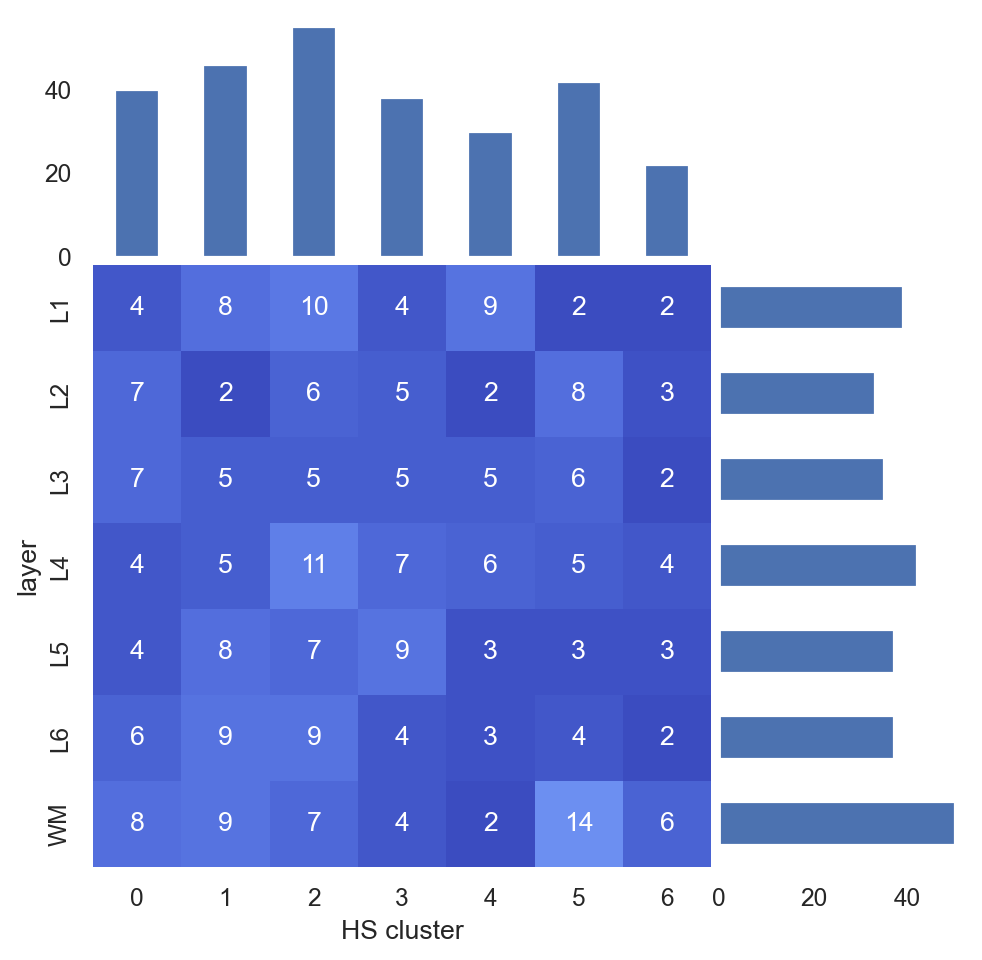

In [64]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(layer_count.T, annot=True, cmap = 'coolwarm', center=40, fmt=".0f", ax=ax, cbar=False)


divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='40%', pad=0.05)
layer_count.sum(axis=1).plot.bar(ax=cax)
cax.set_facecolor(color='white')
cax.get_xaxis().set_visible(False)

cax = divider.append_axes('right', size='40%', pad=0.05)
index_order = layer_count.columns[::-1]
layer_count.sum(axis=0).loc[index_order].plot.barh(ax=cax)
cax.set_facecolor(color='white')
cax.get_yaxis().set_visible(False)

## Cluster intersection of ANOVA significant and human-specific (profiles) genes

D:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


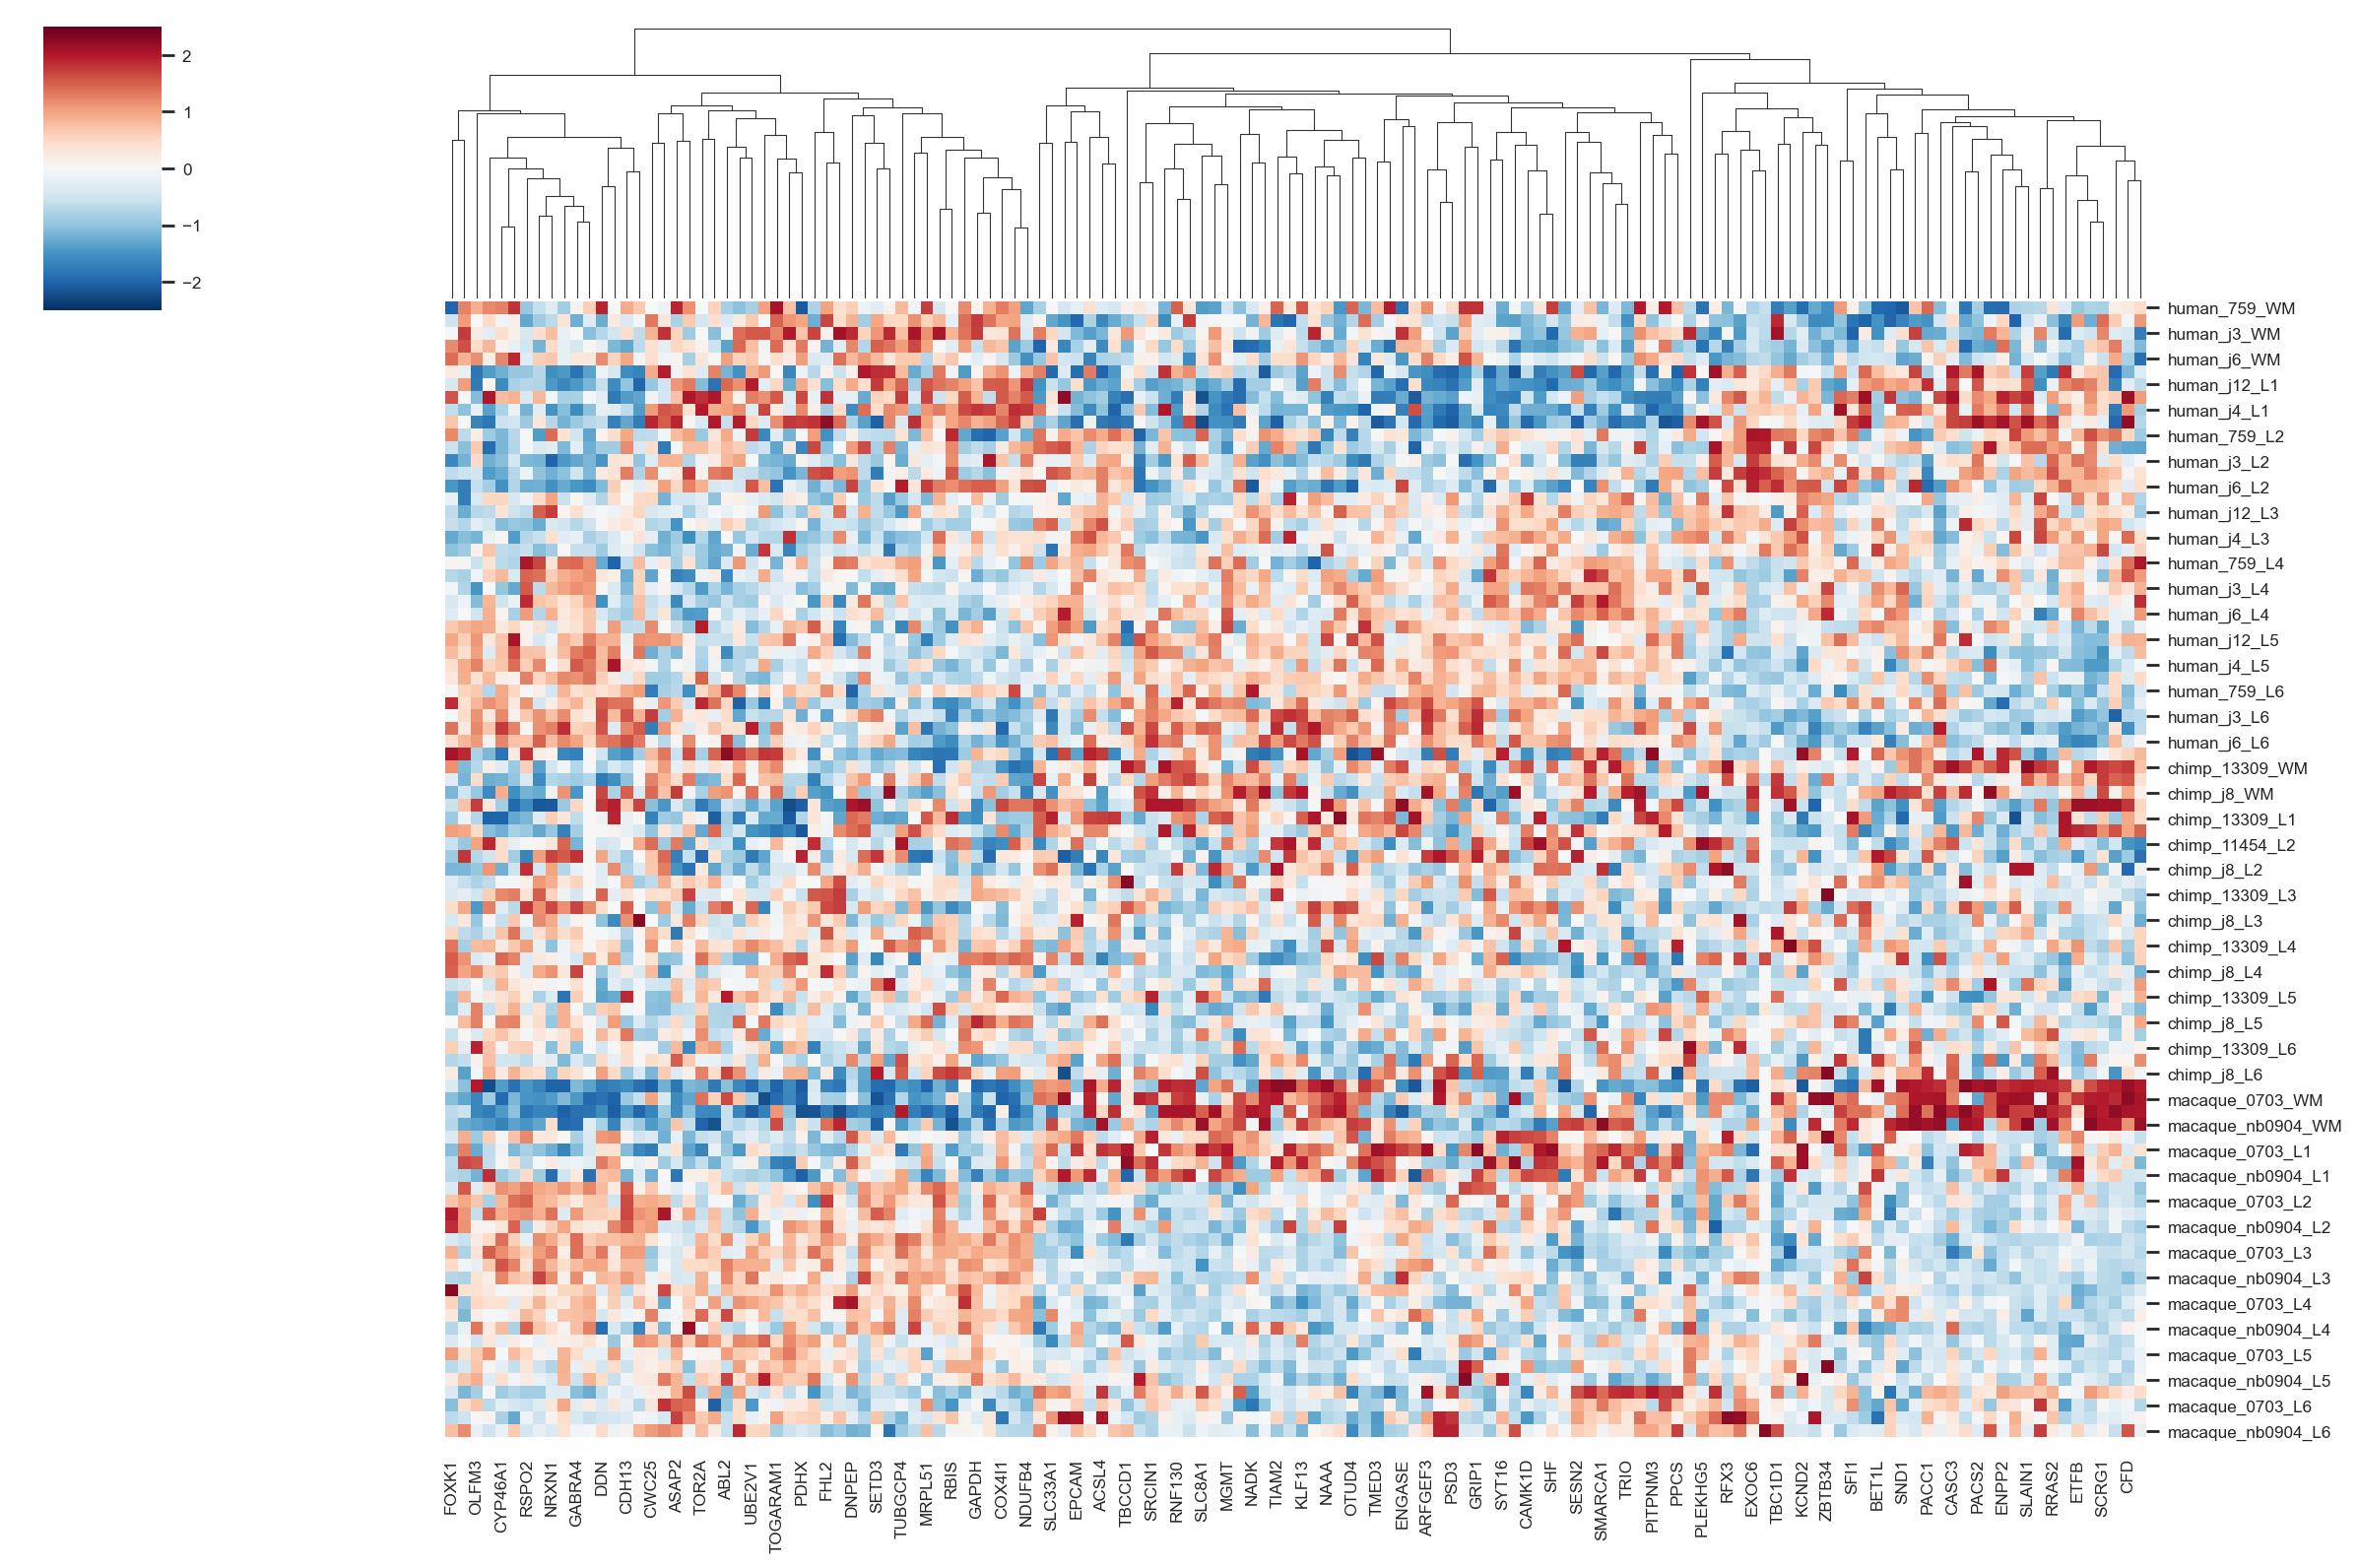

In [65]:
sns.set(font_scale=0.7)
sns.clustermap(df[anova_hs_inter], figsize=(15, 10), cmap="RdBu_r", center=0, vmax=2.5, vmin=-2.5, metric='cosine', annot_kws={"size": 2}, row_cluster=False)

In [66]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import pairwise_kernels
aff_matrix = pairwise_kernels(df[anova_hs_inter].T, metric='cosine') + 1
n_clusters = 7
clustering = SpectralClustering(n_clusters=n_clusters, gamma=1, affinity='precomputed', random_state=4)
clustering.fit(aff_matrix)

SpectralClustering(affinity='precomputed', gamma=1, n_clusters=7,
                   random_state=4)

In [67]:
labels = pd.Series(clustering.labels_, index=anova_hs_inter).sort_values()
order = labels.sort_values().index

In [68]:
labels.name = 'clusters'
labels.to_csv('results/hs_prof_anova.csv')

In [69]:
labels = pd.read_csv('results/hs_prof_anova.csv', index_col=0)['clusters']
labels

ABL2       0
MLH3       0
CWC25      0
CTDSPL     0
RRAS2      0
          ..
CDH13      6
DGKA       6
SH3GLB1    6
CADM1      6
NADK       6
Name: clusters, Length: 136, dtype: int64

<Axes: >

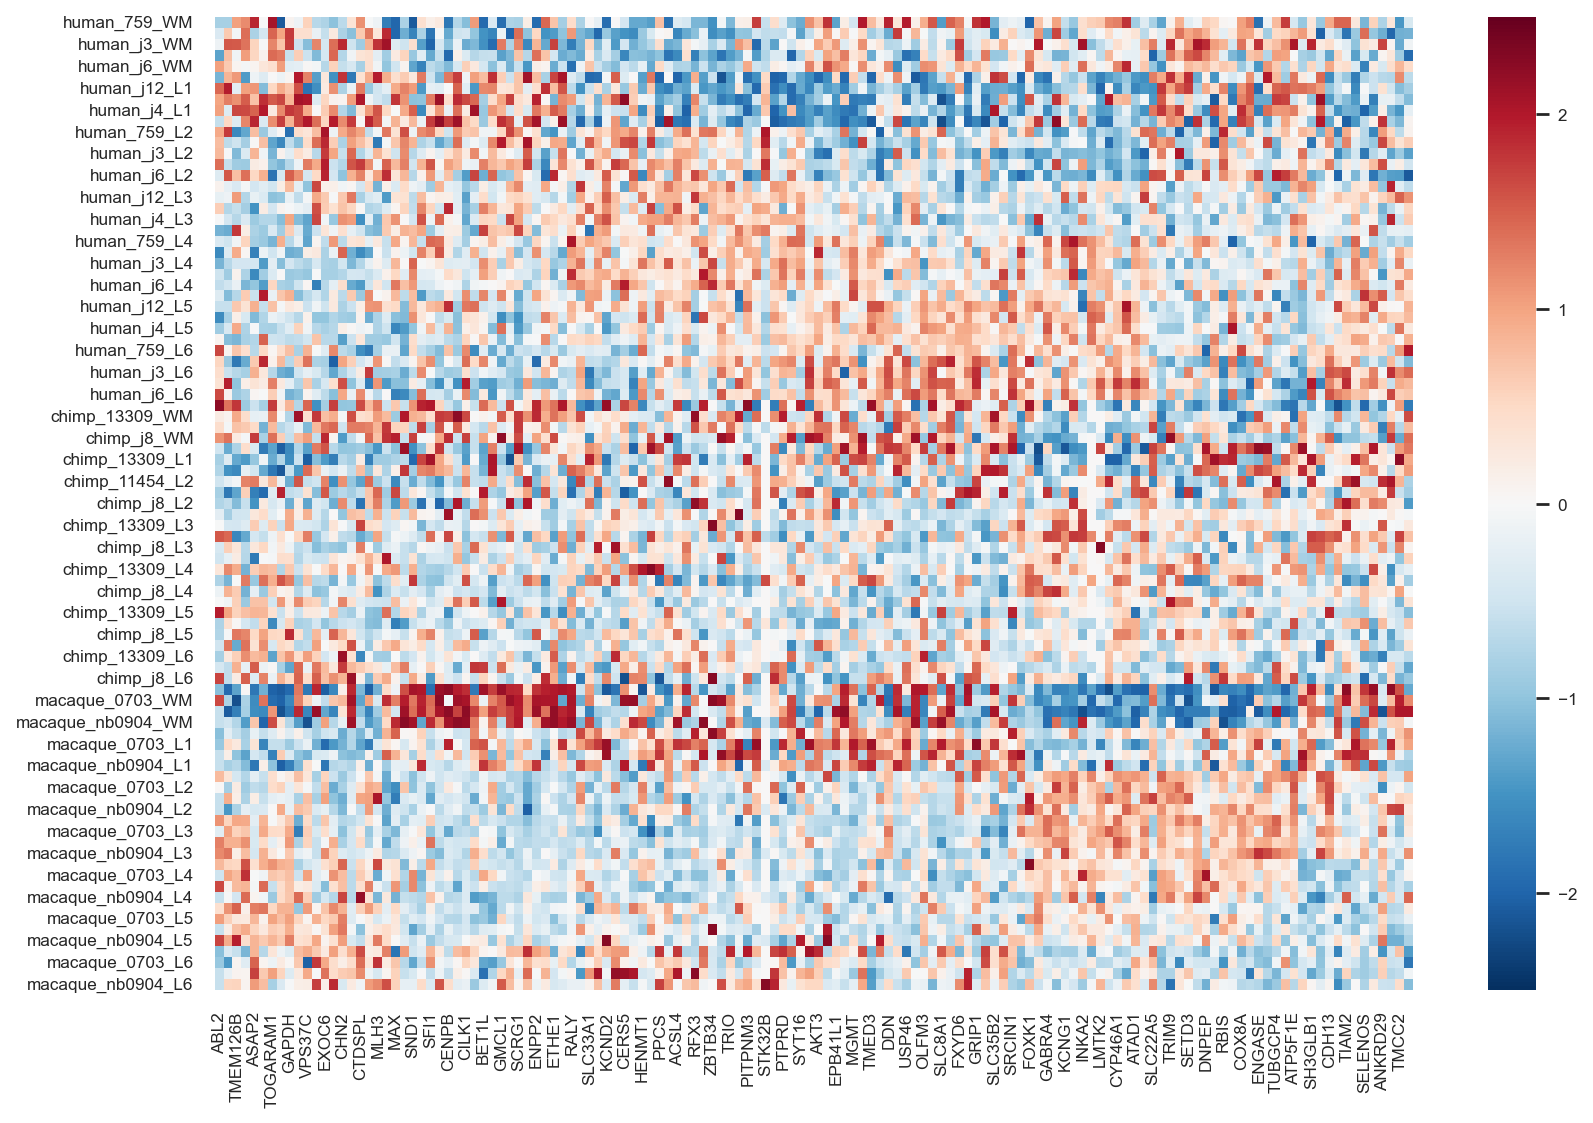

In [70]:
sns.set(font_scale=0.7)
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.loc[sample_order['all'], order], ax=ax, cmap="RdBu_r", vmax=2.5, vmin=-2.5, center=0)
#plt.savefig(f'heatmaps/heatmap_spectr{n_clusters}_anova.png', bbox_inches='tight')

In [71]:
df_annotation = df[hs_genes].copy()
df_annotation['layer'] = adata_pb_norm.obs.layer
df_annotation['condition'] = adata_pb_norm.obs.condition

In [72]:
layer_mean = df_annotation.groupby(['condition', 'layer']).mean()
layer_mean.head()

ABL2     ACSL4      AKT3     AMER2   ANKRD29     APBA1  \
condition layer                                                               
chimp     L1    -0.686058  0.524083 -0.441710  1.088793  0.261183 -0.397902   
          L2    -0.686058 -0.818999 -0.526617 -0.045575  1.071689  0.295968   
          L3     0.213414  0.215657  0.123264 -0.310359  0.831205  0.519935   
          L4    -0.275781 -0.525698 -0.201124 -0.519289  0.145844 -0.125792   
          L5     0.105707  0.203608 -0.646220 -0.398836  0.159298 -0.488295   

                  ARFGEF3     ASAP2     ATAD1   ATP5F1E  ...     TRIM9  \
condition layer                                          ...             
chimp     L1     0.130788 -0.602761 -0.775195  0.830572  ... -0.646238   
          L2     0.268740 -0.633522  0.752684 -0.261341  ... -0.019331   
          L3    -0.367704  0.185047  0.214706  0.149551  ...  0.047065   
          L4    -0.002306 -0.581830  0.112722  0.388310  ...  0.230547   
          L5    -0.139190  0.368900 -0.001449 -0.034932  ...  0.589260   

                     TRIO      TSPO   TUBGCP4    UBE2V1    UNC13A     USP46  \
condition layer                                                               
chimp     L1     0.050415  0.628075 -0.308768 -1.026935 -0.707192  1.186548   
          L2     0.242231 -0.813974  0.808860 -0.884772 -0.707192 -0.741850   
          L3    -0.444618 -0.413851  0.072744  0.189302  0.635265 -0.923500   
          L4    -0.638372 -0.695250 -0.004791  0.165501 -0.151694 -0.626382   
          L5    -0.393268 -0.049638 -0.539113  0.309770 -0.041295 -0.295141   

                   VPS37C    ZBTB34       ZYX  
condition layer                                
chimp     L1    -0.663865 -0.251976  0.252614  
          L2    -0.512767 -0.251976 -0.645583  
          L3     0.306340  0.160184  0.367243  
          L4     0.095122 -0.015074  0.850038  
          L5    -0.150435 -0.296694 -0.293464  

[5 rows x 142 columns]

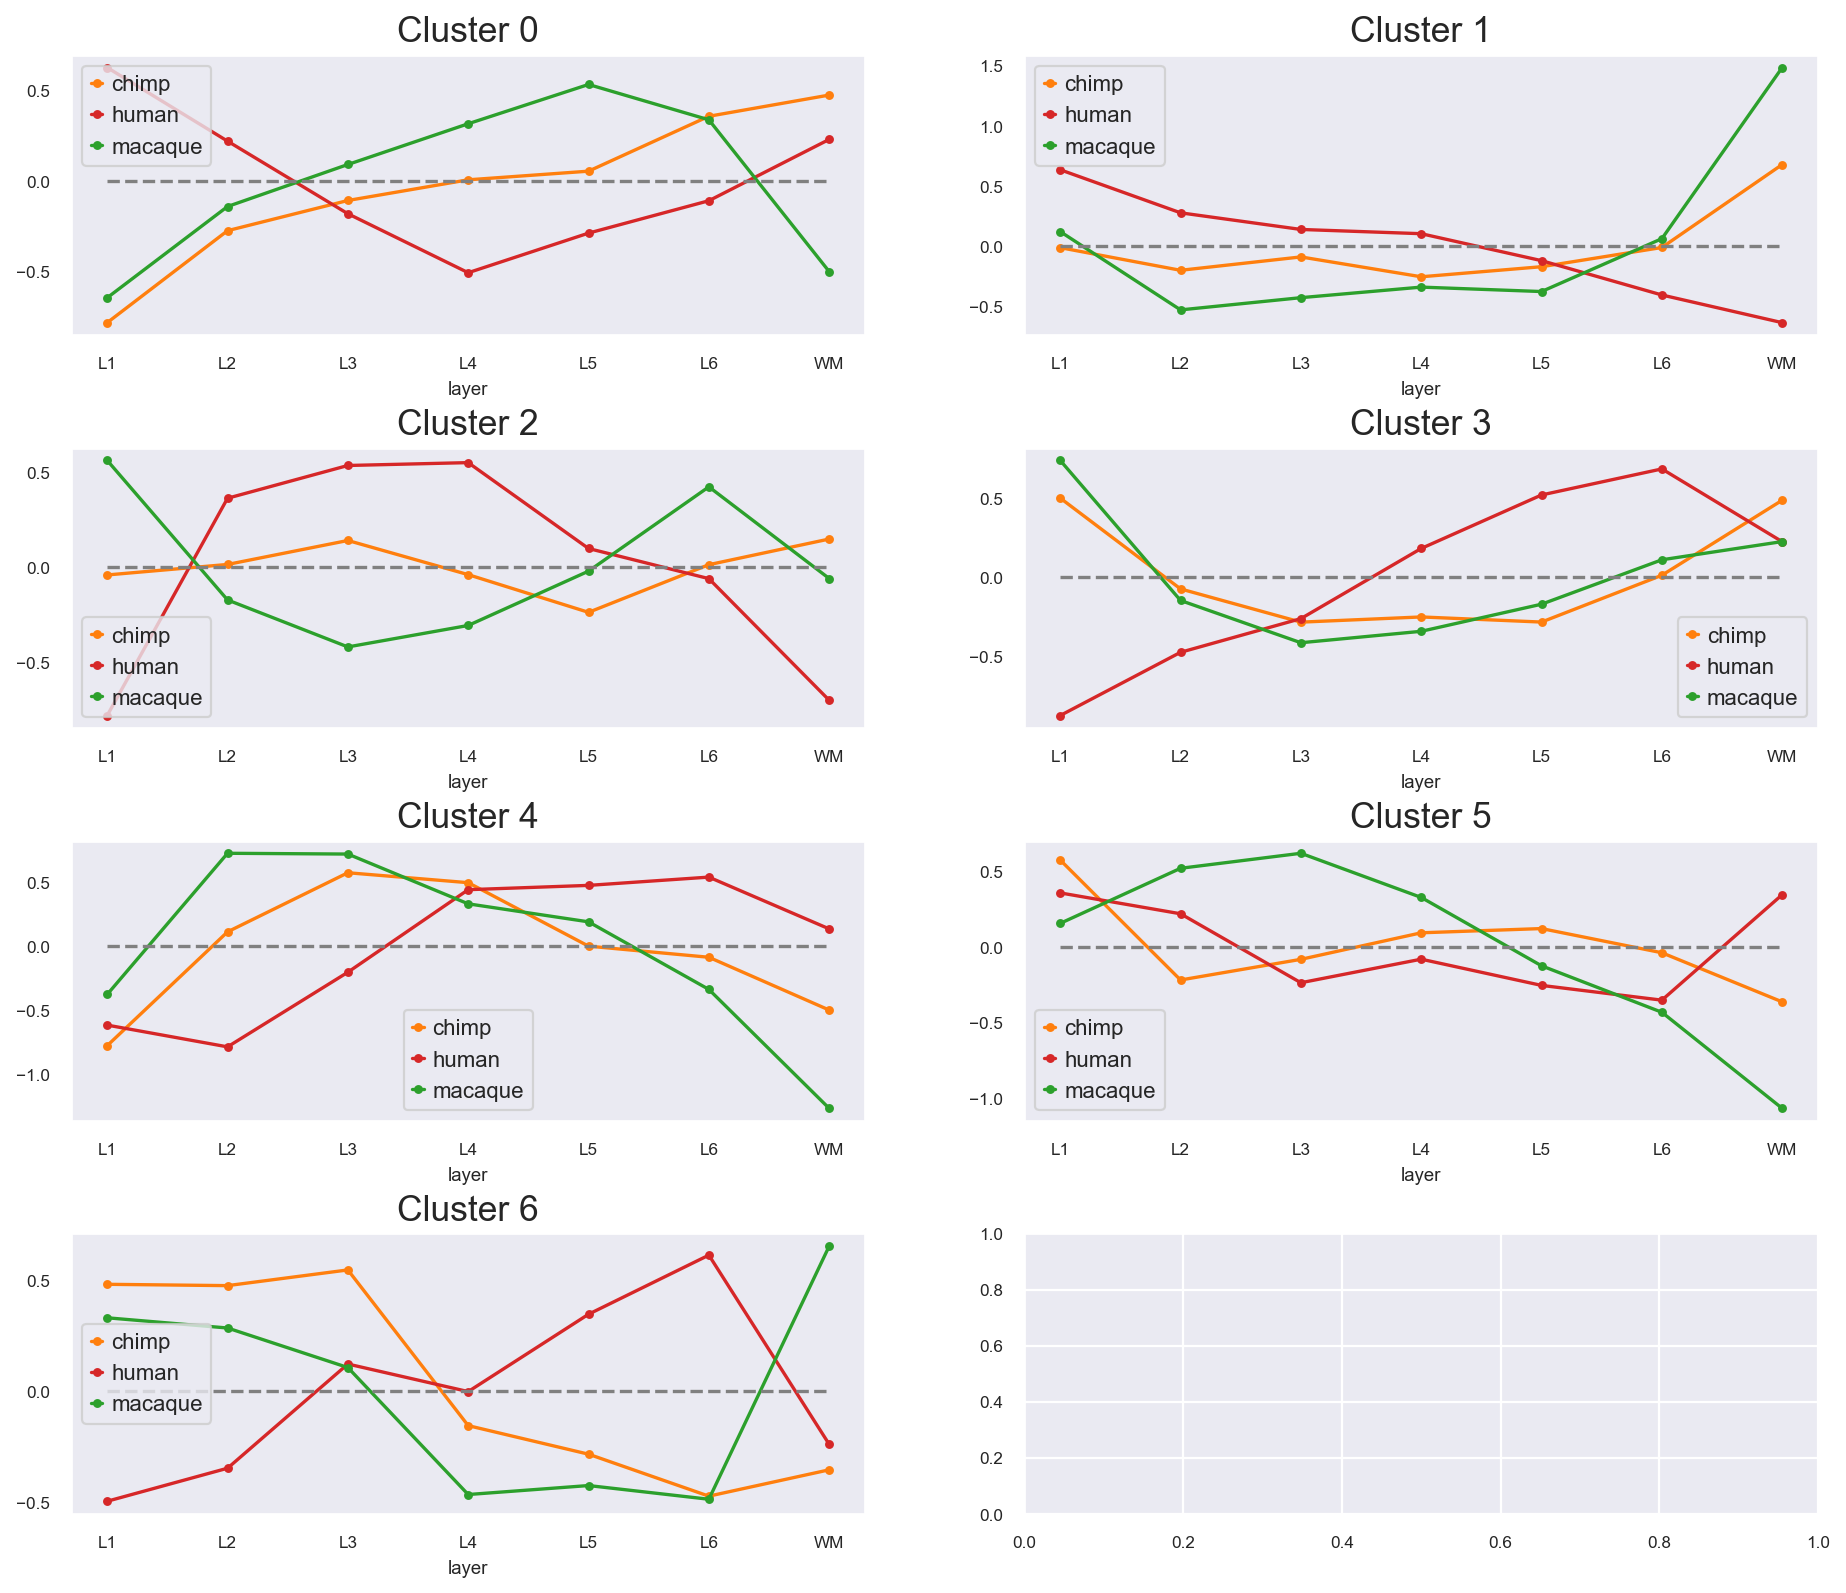

In [73]:
fig, axes = plt.subplots((n_clusters + 1) // 2, 2,  figsize=(14, 3.5 * n_clusters // 2), gridspec_kw={'hspace': 0.4})
sns.set(font_scale=1)
for label, ax in zip(labels.unique(), axes.flatten()):
    genes = labels[labels == label].index.tolist()

    (
        layer_mean[genes]
        .mean(axis=1)
        .reorder_levels(['layer', 'condition'])
        .unstack().loc[layers]
        .plot
        .line(color={'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green'}, ax=ax, marker='.')
    )
    ax.legend(fontsize=10)
    ax.set_title(f'Cluster {label}', fontsize=16)
    ax.grid(False)
    ax.hlines(0, xmin=0, xmax=6, colors='gray', linestyles='dashed')
#plt.savefig(f'hs_clusters.png', bbox_inches='tight')

In [74]:
table_to_pivot = pd.concat([anova_labels.loc[anova_hs_inter], labels.loc[anova_hs_inter]], axis=1)
table_to_pivot.columns = ['ANOVA_labels', 'hs_labels']
pivot_labels_inter = table_to_pivot.groupby('ANOVA_labels').value_counts().unstack().fillna(0)
pivot_labels_inter

hs_labels        0     1     2     3     4    5    6
ANOVA_labels                                        
1             10.0   3.0   6.0   0.0   0.0  2.0  0.0
2              2.0   0.0   0.0   0.0  12.0  5.0  3.0
3              0.0   0.0   0.0   1.0   0.0  5.0  0.0
4              3.0  15.0   1.0   4.0   0.0  1.0  3.0
5              0.0   2.0  12.0  15.0   1.0  0.0  4.0
6              0.0   1.0   7.0   3.0   2.0  5.0  2.0
7              5.0   0.0   0.0   1.0   0.0  0.0  0.0

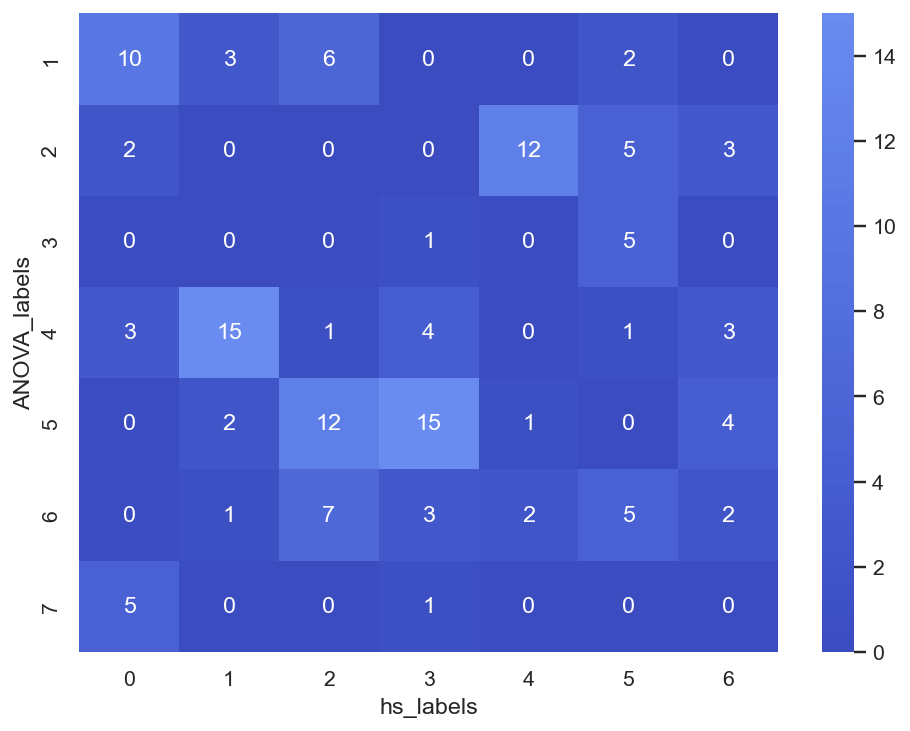

In [75]:
plt.figure(figsize=(8, 6), dpi=70)
sns.set(font_scale=1)
sns.heatmap(pivot_labels_inter, annot=True, cmap = 'coolwarm', center=50, fmt=".0f")
plt.grid(False)

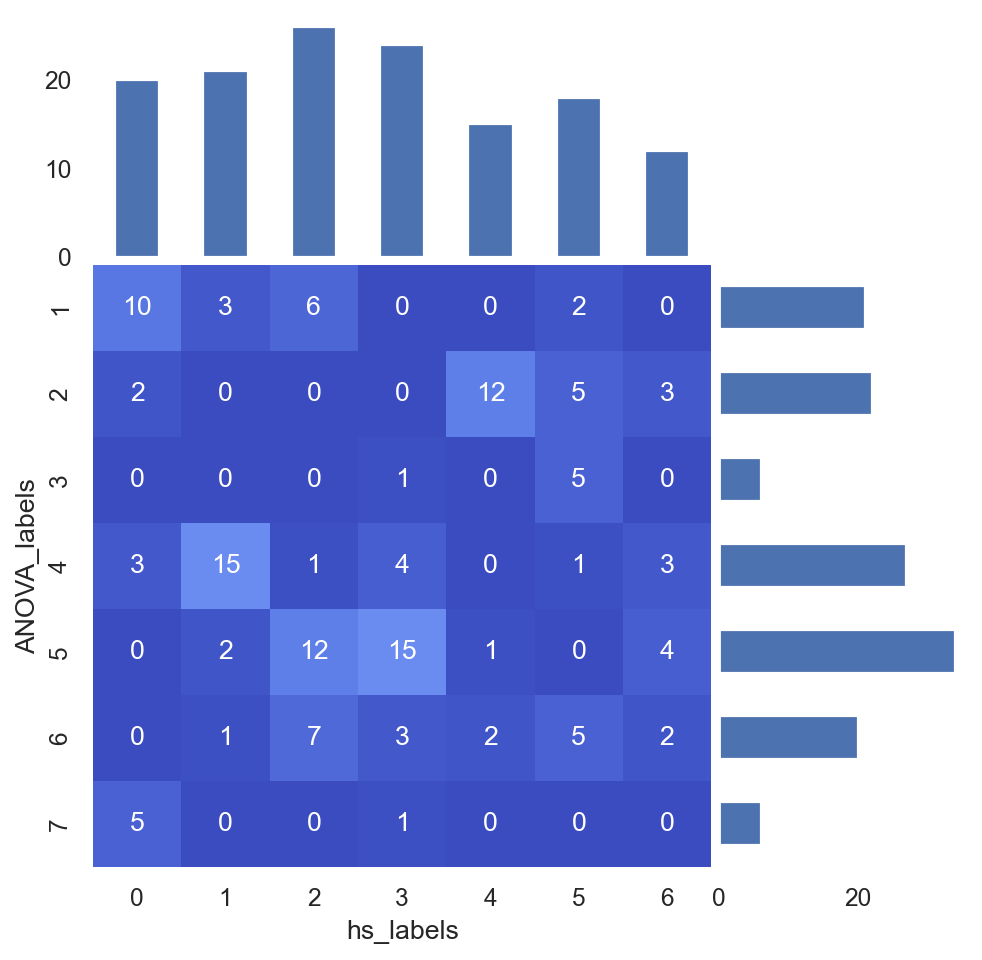

In [76]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(pivot_labels_inter, annot=True, cmap = 'coolwarm', center=50, fmt=".0f", ax=ax, cbar=False)


divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='40%', pad=0.05)
pivot_labels_inter.sum(axis=0).plot.bar(ax=cax)
cax.set_facecolor(color='white')
cax.get_xaxis().set_visible(False)

cax = divider.append_axes('right', size='40%', pad=0.05)
index_order = pivot_labels_inter.index[::-1]
pivot_labels_inter.sum(axis=1).loc[index_order].plot.barh(ax=cax)
cax.set_facecolor(color='white')
cax.get_yaxis().set_visible(False)

In [77]:
onehot_unstack = hum_spec_anova_onehot.unstack()
onehot_unstack.name = 'hum-spec & ANOVA'
onehot_unstack = onehot_unstack.to_frame()
onehot_unstack.index.names = ['gene', 'layer']
onehot_unstack.index.get_level_values('gene')
onehot_unstack.reset_index(level=1, inplace=True)
onehot_unstack['HS cluster'] = labels.loc[onehot_unstack.index]
layer_count = onehot_unstack[onehot_unstack['hum-spec & ANOVA'] == 1].groupby(['HS cluster', 'layer']).count().unstack()
layer_count = layer_count['hum-spec & ANOVA']
layer_count

layer       L1  L2  L3  L4  L5  L6  WM
HS cluster                            
0            4   6   5   7  10   4   3
1            2   7   7   7   2   5  17
2           10   6   5  10   6   7   6
3           12   3   6   7   6   4   7
4            4   7   7   3   4   6   7
5            3   3   3   4   3   4   8
6            4   1   2   4   6   7   2

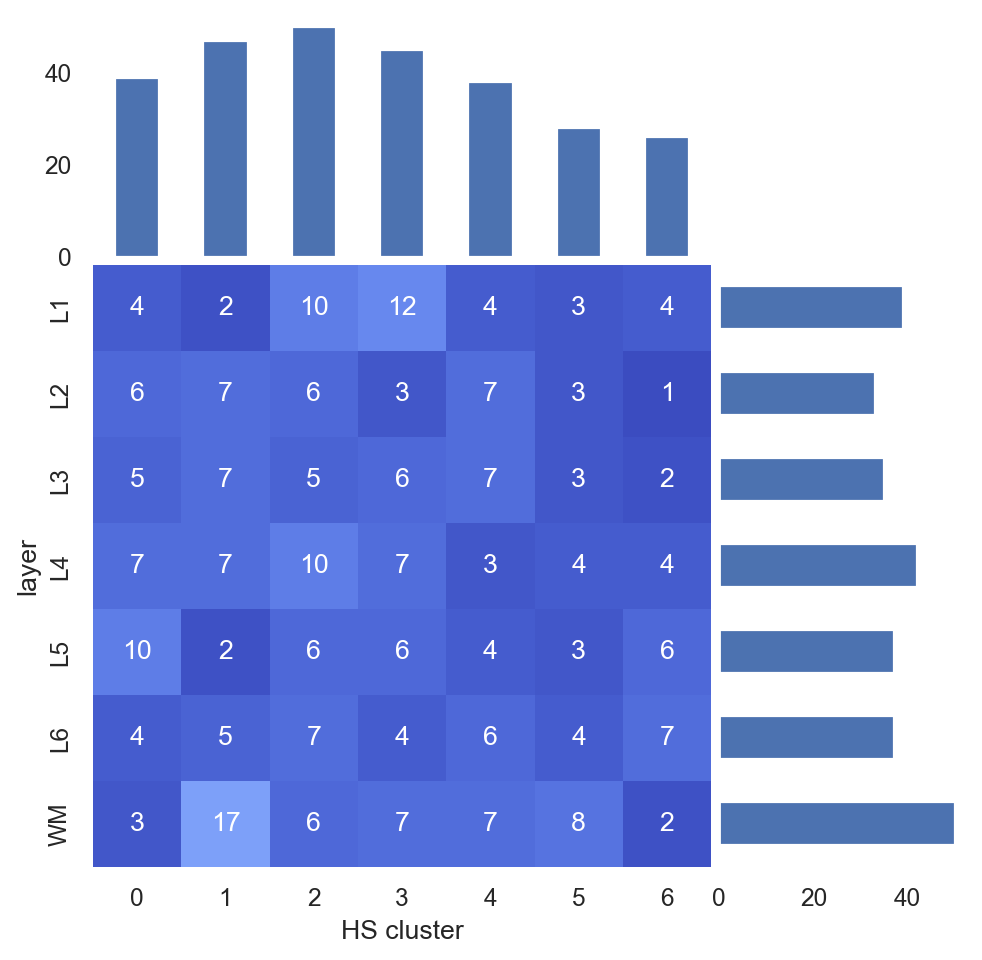

In [78]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(layer_count.T, annot=True, cmap = 'coolwarm', center=40, fmt=".0f", ax=ax, cbar=False)


divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='40%', pad=0.05)
layer_count.sum(axis=1).plot.bar(ax=cax)
cax.set_facecolor(color='white')
cax.get_xaxis().set_visible(False)

cax = divider.append_axes('right', size='40%', pad=0.05)
index_order = layer_count.columns[::-1]
layer_count.sum(axis=0).loc[index_order].plot.barh(ax=cax)
cax.set_facecolor(color='white')
cax.get_yaxis().set_visible(False)